In [1]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import torchDatasets as ds
import networks as custNN

sns.set_theme(style='whitegrid')

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams['figure.dpi']= 300

import torch
import torch.nn as nn
from torchvision.transforms import v2


# Device configuration
device = 'cpu' #torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# def manualSeed(seed:int):
#     torch.manual_seed(seed)
#     torch.cuda.manual_seed(seed)
#     torch.cuda.manual_seed_all(seed)
#     torch.backends.cudnn.deterministic = True
#     torch.backends.cudnn.benchmark = False
side = 30
base_dir = '/home/shashank/Code/gonihedric/'; data_dir = base_dir + "data/"
date= "2025-07-09_12-06-26";
# date = "2025-06-19_08-40-39"

Local minimum at epoch 2: 0.7477034330368042


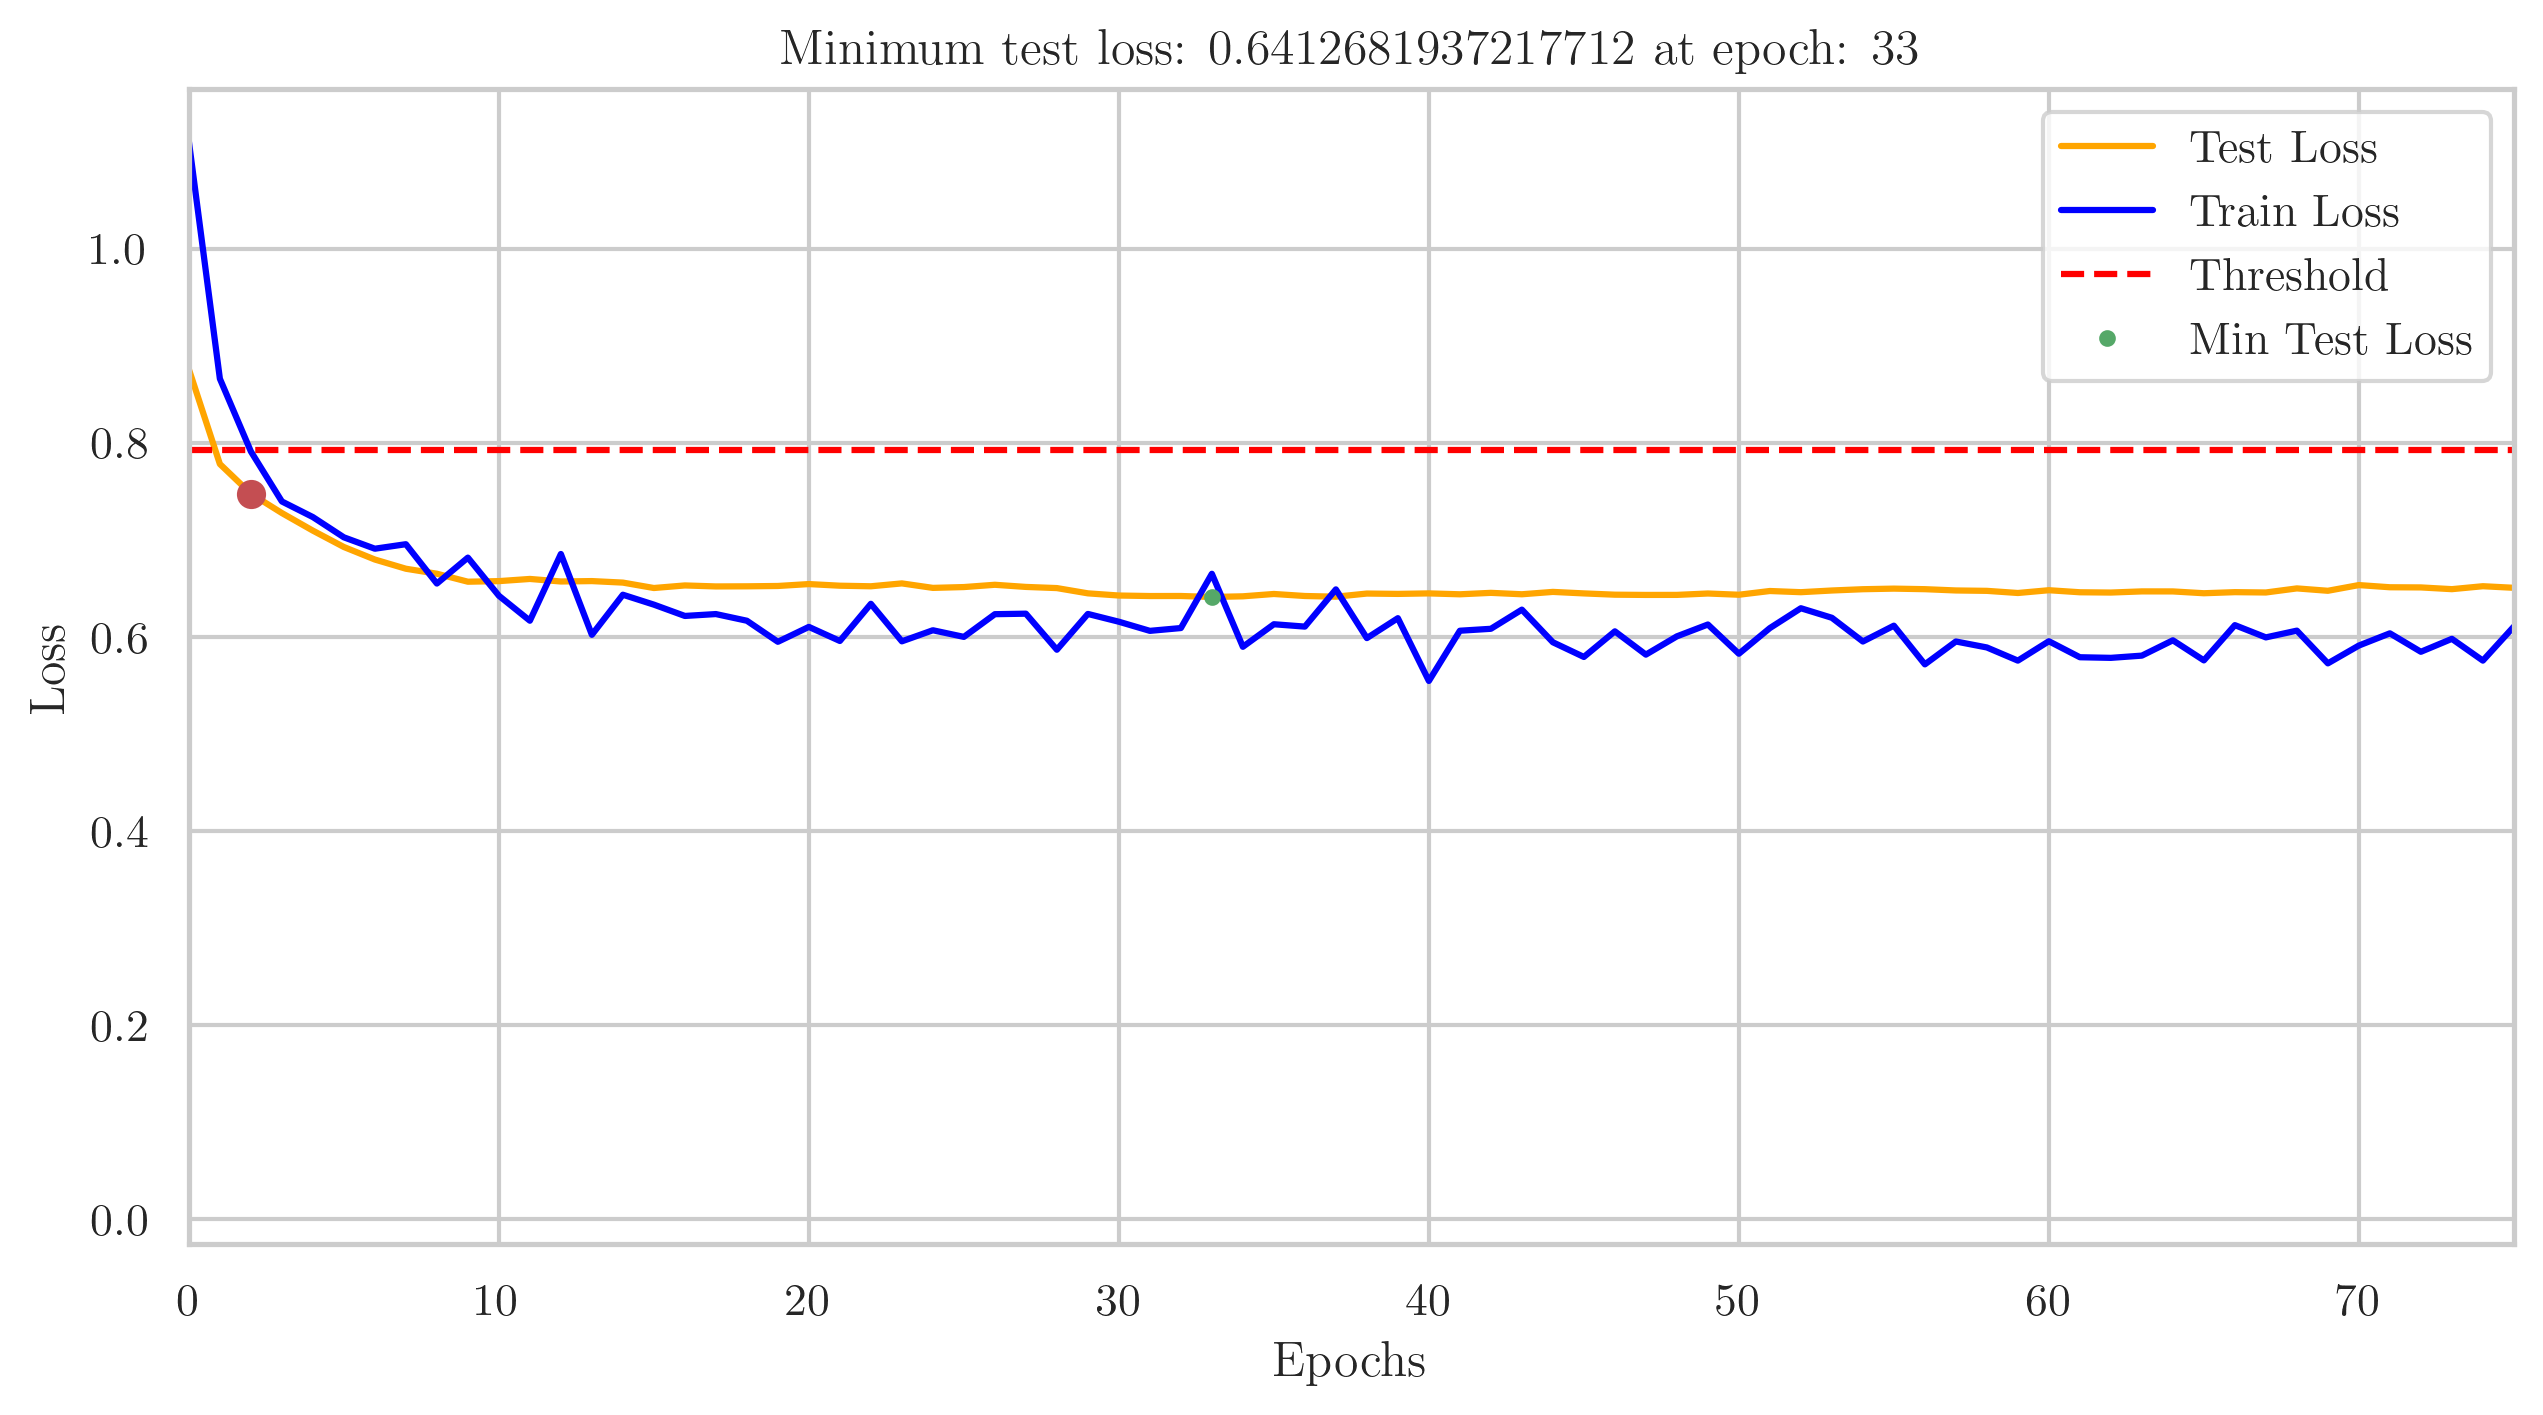

Local minimum at epoch 1132: 0.6712173223495483


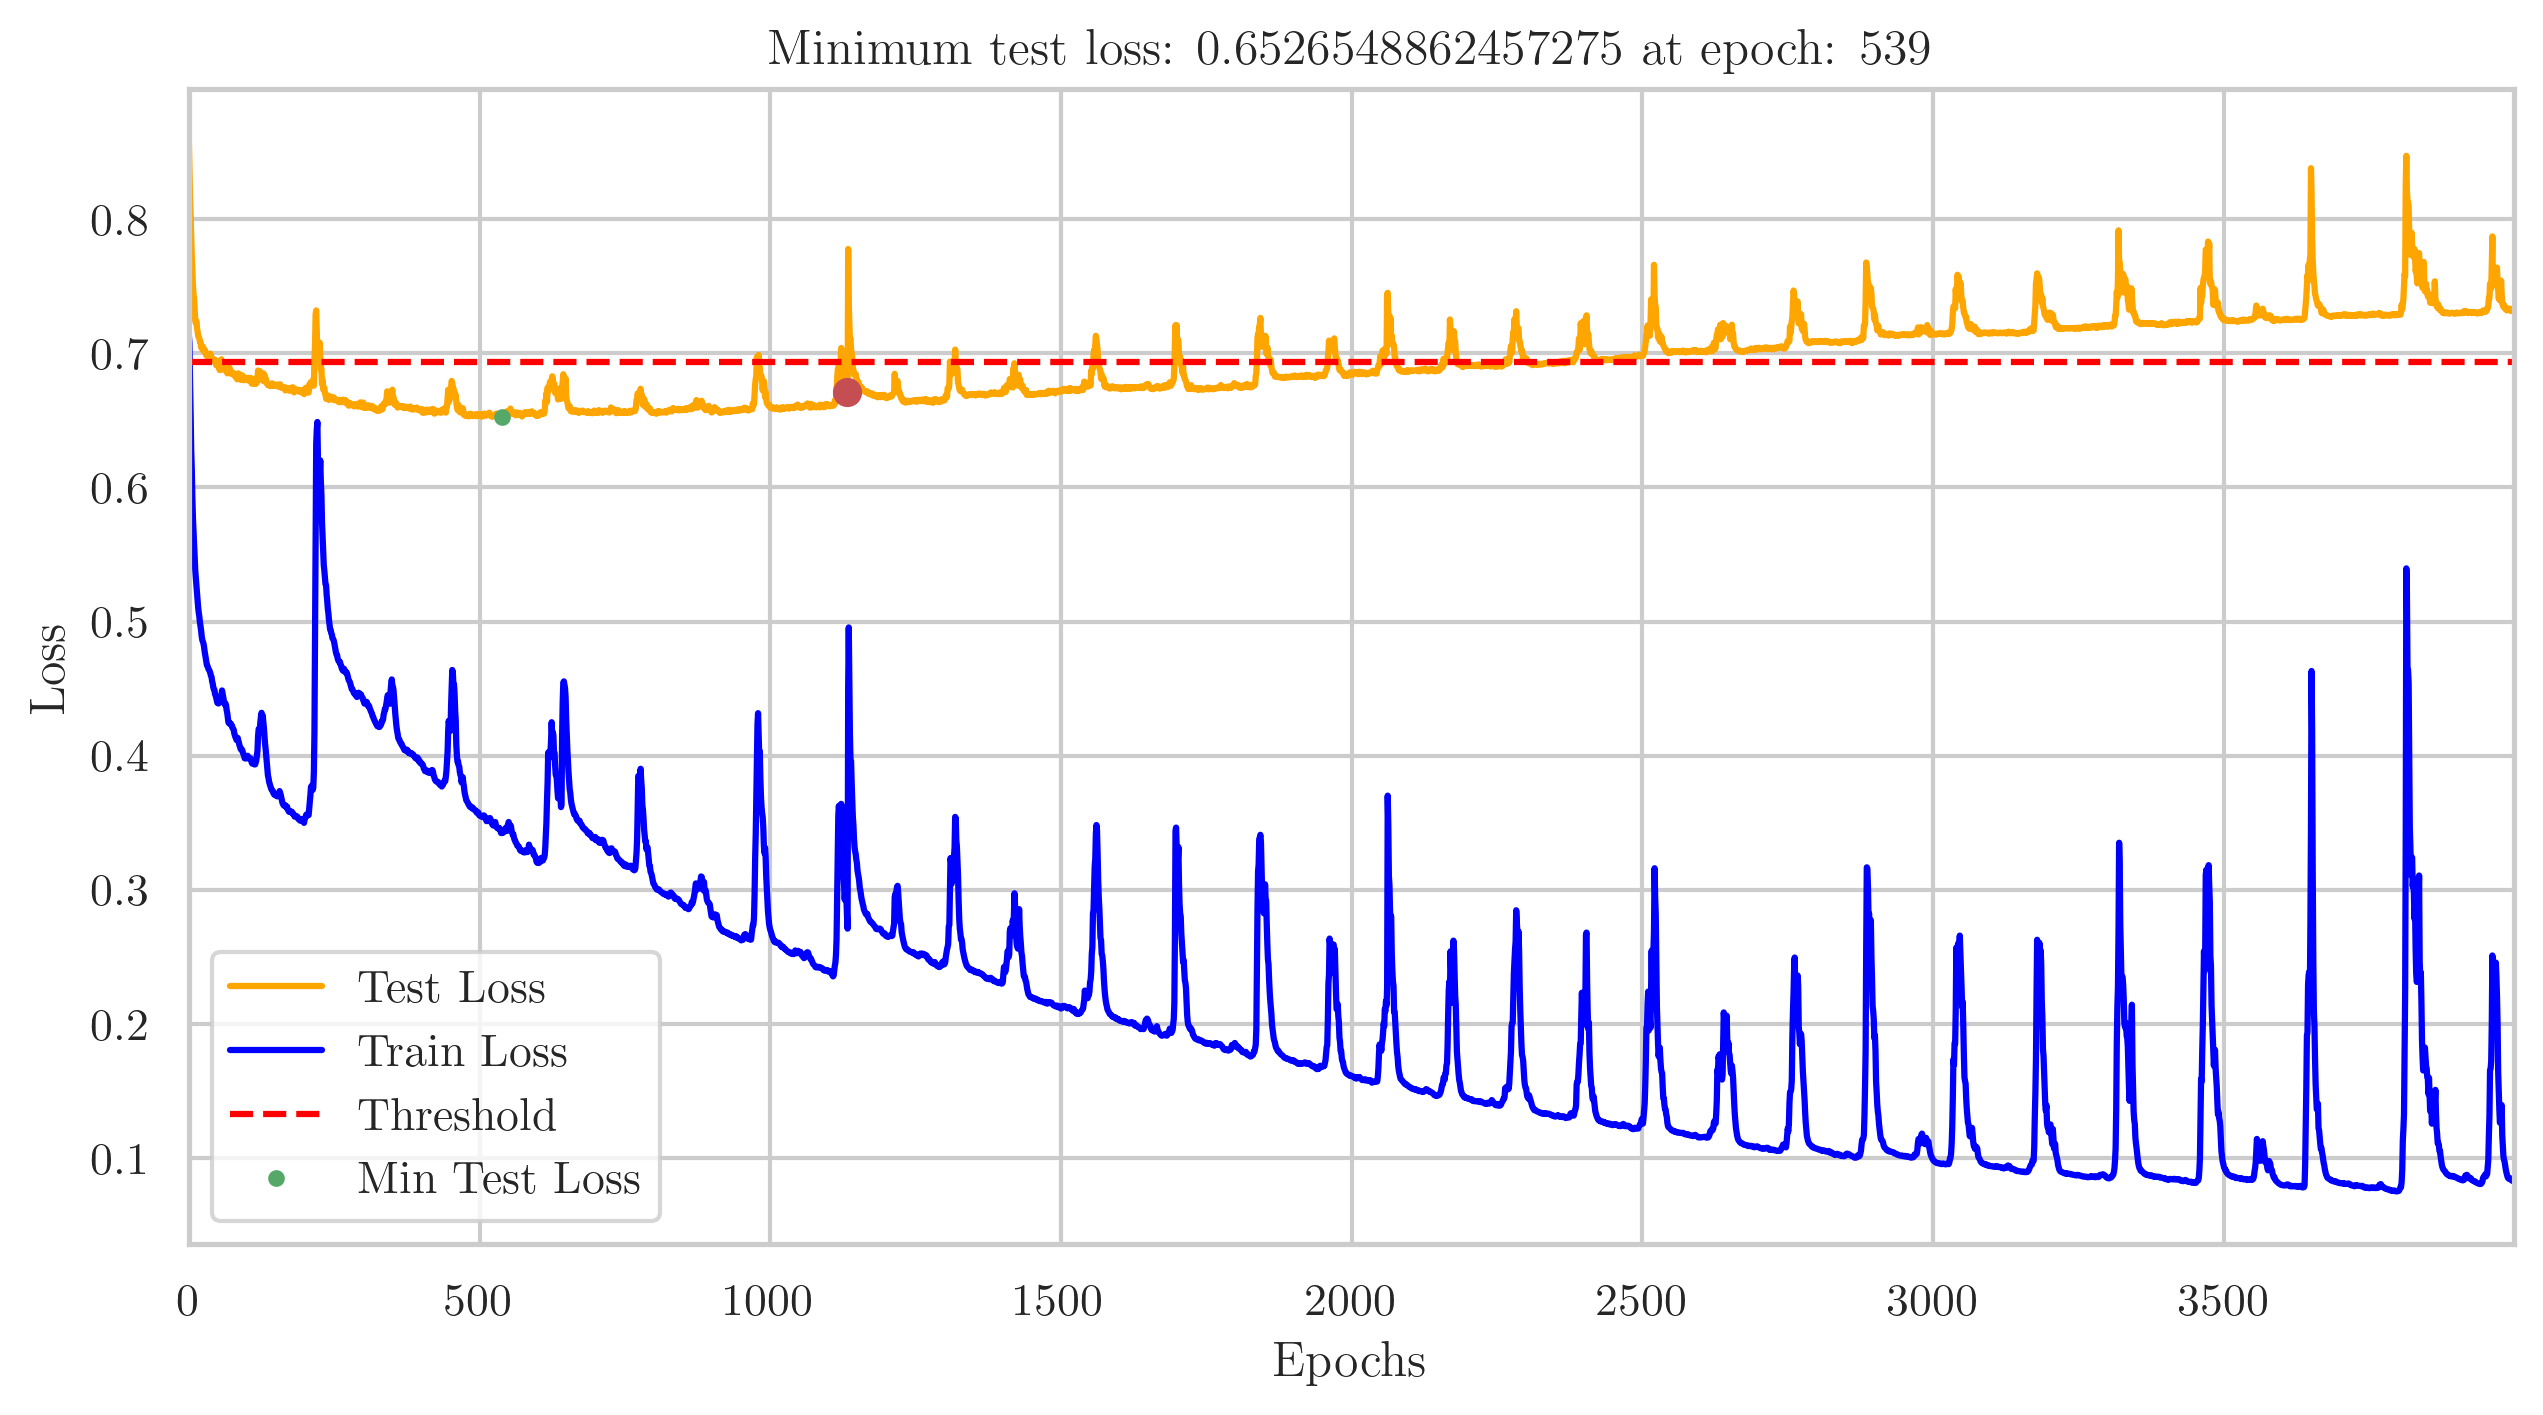

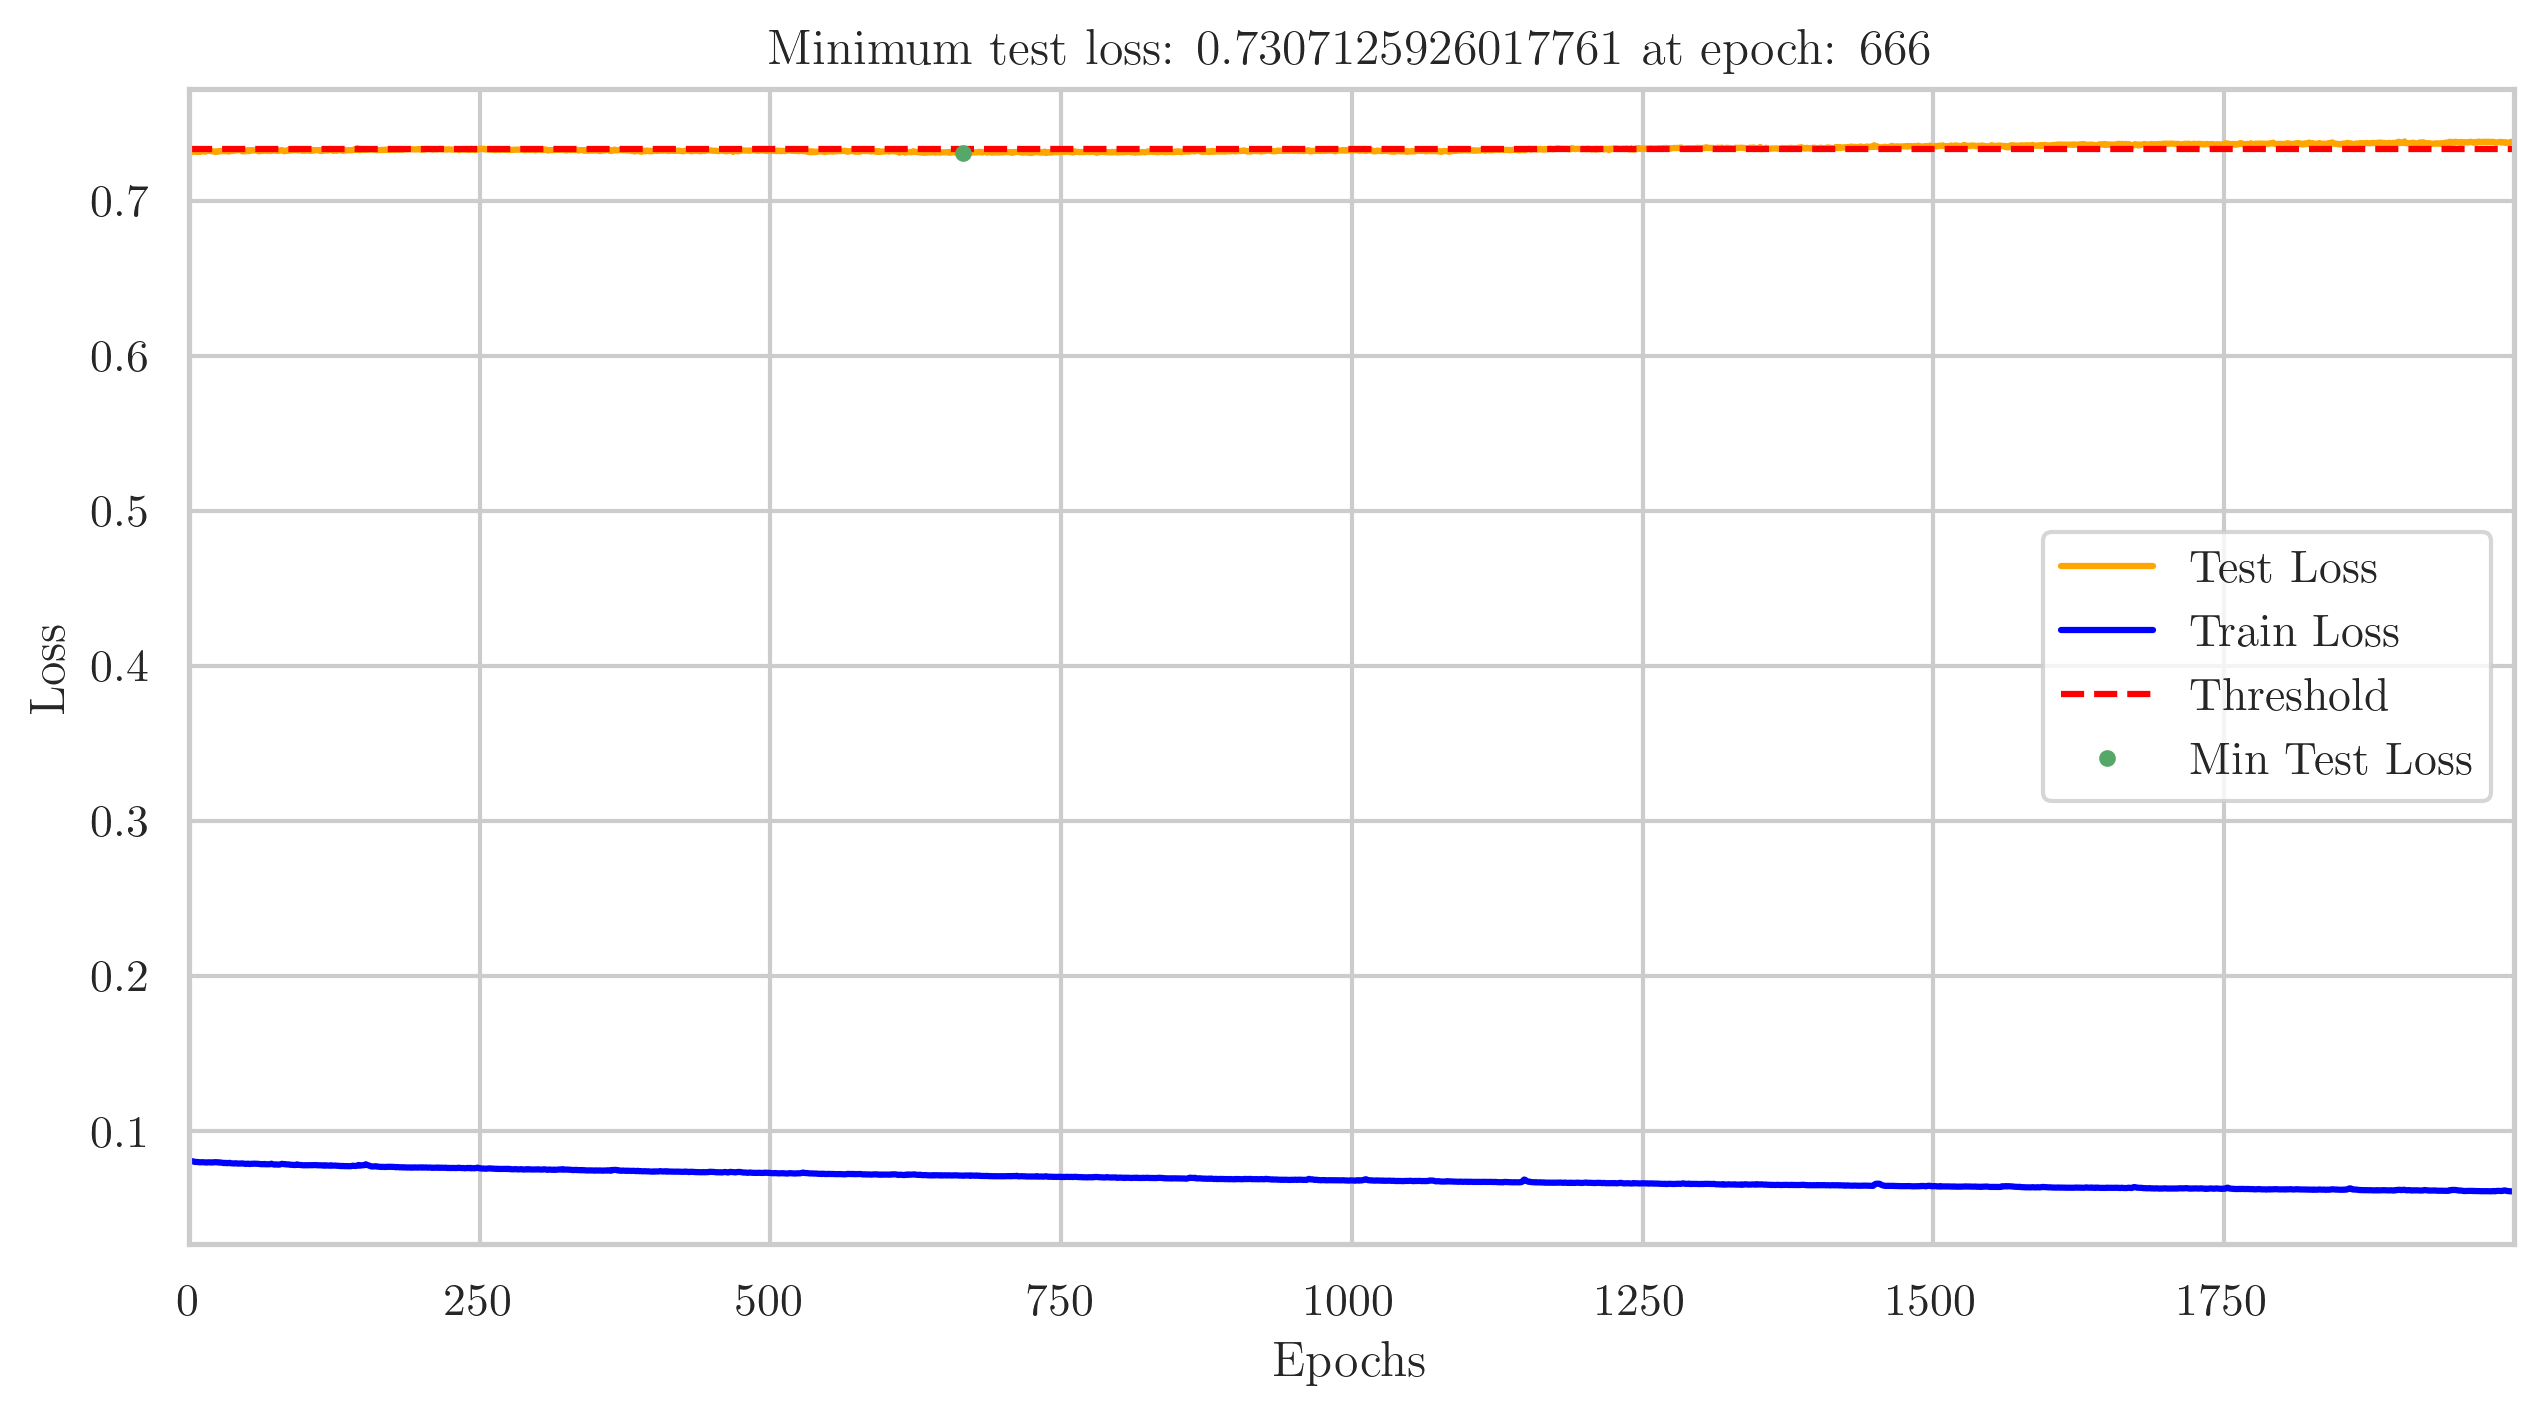

In [95]:
phase = "/1/"
test = np.load(data_dir+"checkpoints/Autoencoder/"+date+phase+"testLosses.npy")
train = np.load(data_dir+"checkpoints/Autoencoder/"+date+phase+"trainLosses.npy")
# plot and mark all the local minima
plt.figure(figsize=(10, 5))
plt.plot(test, label='Test Loss', color='orange')
plt.plot(train, label='Train Loss', color='blue')
plt.hlines(y=test[20:].mean(), xmin=0, xmax=len(test)-1, color='red', linestyle='--', label='Threshold')
plt.title(f"Minimum test loss: {np.min(test)} at epoch: {np.argmin(test)}")
plt.plot(np.argmin(test), test[np.argmin(test)], 'g.', label='Min Test Loss')
threshold = 0.1; points = 2
for i in range(points, len(test)-points):
    if (test[i-points] - test[i] > threshold) or (test[i+points] - test[i]>threshold):
        plt.plot(i, test[i], 'ro')  # Mark local minima with red dots
        print(f"Local minimum at epoch {i}: {test[i]}")

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(0, len(test)-1)
# plt.ylim(np.min(test)-0.01, np.max(test[20:])+0.01)
plt.legend()
# plt.grid()
# plt.savefig(data_dir + "checkpoints/Autoencoder/loss_plot.png")
plt.xlim(0, 75)
plt.show()

phase = "/2/"
test = np.load(data_dir+"checkpoints/Autoencoder/"+date+phase+"testLosses.npy")
train = np.load(data_dir+"checkpoints/Autoencoder/"+date+phase+"trainLosses.npy")
# plot and mark all the local minima
plt.figure(figsize=(10, 5))
plt.plot(test, label='Test Loss', color='orange')
plt.plot(train, label='Train Loss', color='blue')
plt.hlines(y=test[20:].mean(), xmin=0, xmax=len(test)-1, color='red', linestyle='--', label='Threshold')
plt.title(f"Minimum test loss: {np.min(test)} at epoch: {np.argmin(test)}")
plt.plot(np.argmin(test), test[np.argmin(test)], 'g.', label='Min Test Loss')
threshold = 0.1; points = 2
for i in range(points, len(test)-points):
    if (test[i-points] - test[i] > threshold) or (test[i+points] - test[i]>threshold):
        plt.plot(i, test[i], 'ro')  # Mark local minima with red dots
        print(f"Local minimum at epoch {i}: {test[i]}")

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(0, len(test)-1)
# plt.ylim(np.min(test)-0.01, np.max(test[20:])+0.01)
plt.legend()
# plt.grid()
# plt.savefig(data_dir + "checkpoints/Autoencoder/loss_plot.png")
# plt.xlim(3500, 4000)
plt.show()

phase = "/3/"
# check if the file exists
if not os.path.exists(data_dir + "checkpoints/Autoencoder/" + date + phase):
    print(f"File not found: {data_dir}checkpoints/Autoencoder/{date}{phase}")
else:
    test = np.load(data_dir+"checkpoints/Autoencoder/"+date+phase+"testLosses.npy")
    train = np.load(data_dir+"checkpoints/Autoencoder/"+date+phase+"trainLosses.npy")
    # plot and mark all the local minima
    plt.figure(figsize=(10, 5))
    plt.plot(test, label='Test Loss', color='orange')
    plt.plot(train, label='Train Loss', color='blue')
    plt.hlines(y=test[20:].mean(), xmin=0, xmax=len(test)-1, color='red', linestyle='--', label='Threshold')
    plt.title(f"Minimum test loss: {np.min(test)} at epoch: {np.argmin(test)}")
    plt.plot(np.argmin(test), test[np.argmin(test)], 'g.', label='Min Test Loss')
    threshold = 0.1; points = 2
    for i in range(points, len(test)-points):
        if (test[i-points] - test[i] > threshold) or (test[i+points] - test[i]>threshold):
            plt.plot(i, test[i], 'ro')  # Mark local minima with red dots
            print(f"Local minimum at epoch {i}: {test[i]}")

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xlim(0, len(test)-1)
    # plt.ylim(np.min(test)-0.01, np.max(test[20:])+0.01)
    plt.legend()
    # plt.grid()
    # plt.savefig(data_dir + "checkpoints/Autoencoder/loss_plot.png")
    # plt.xlim(3500, 4000)
    plt.show()

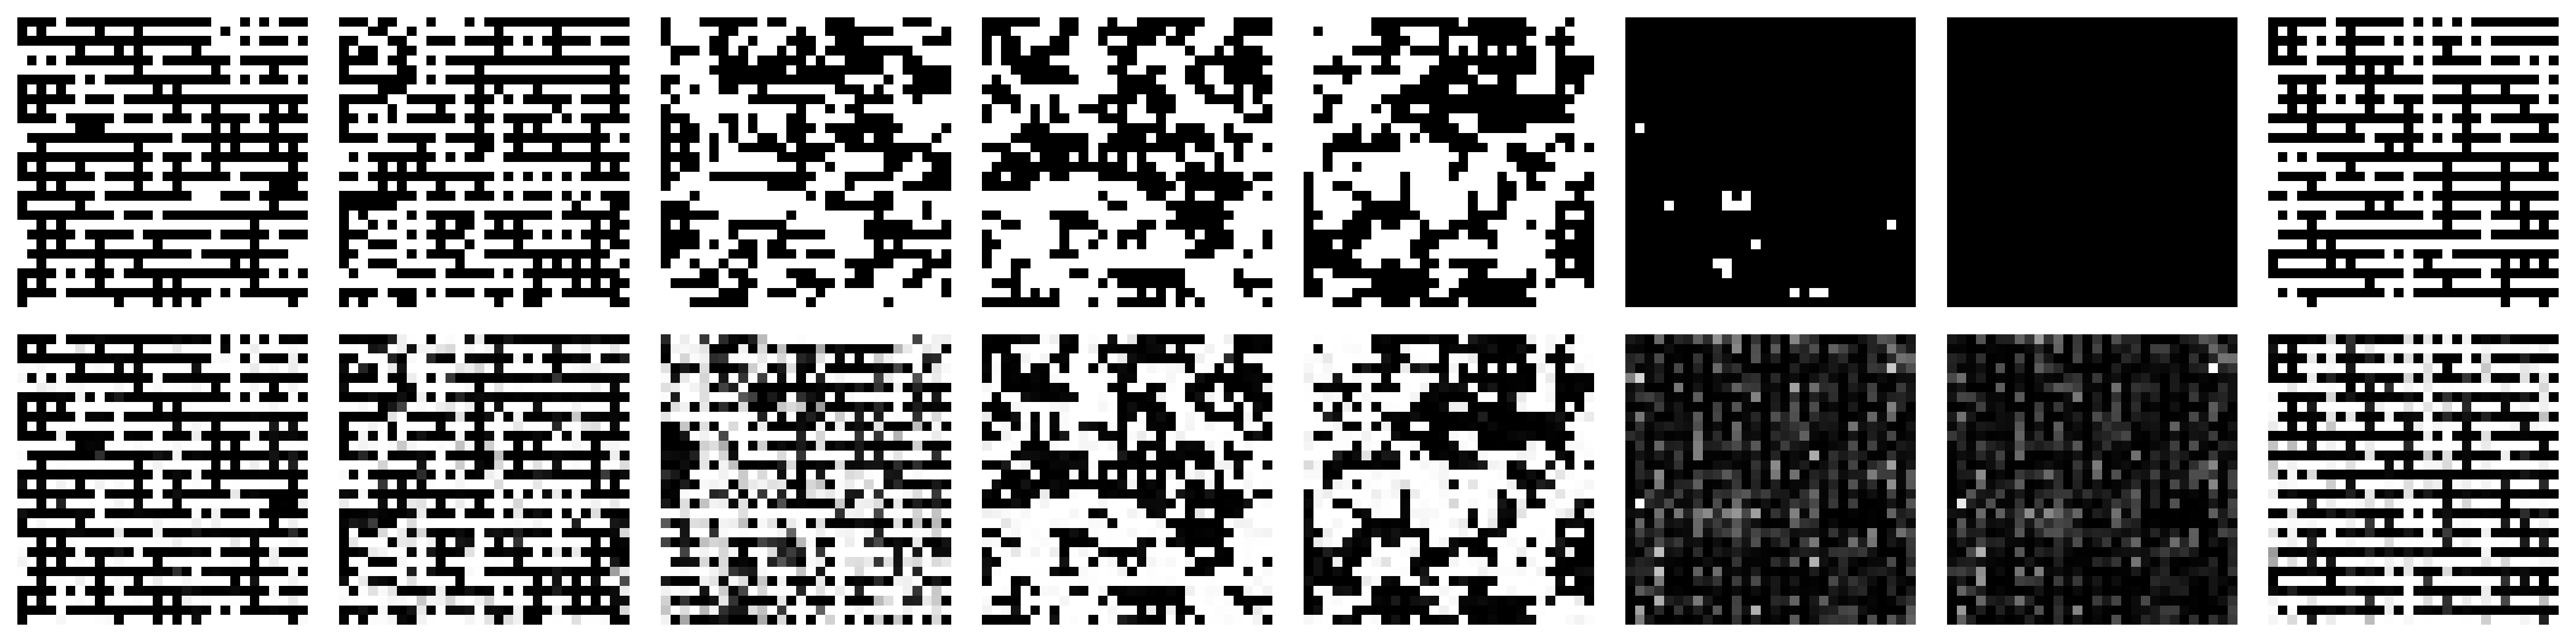

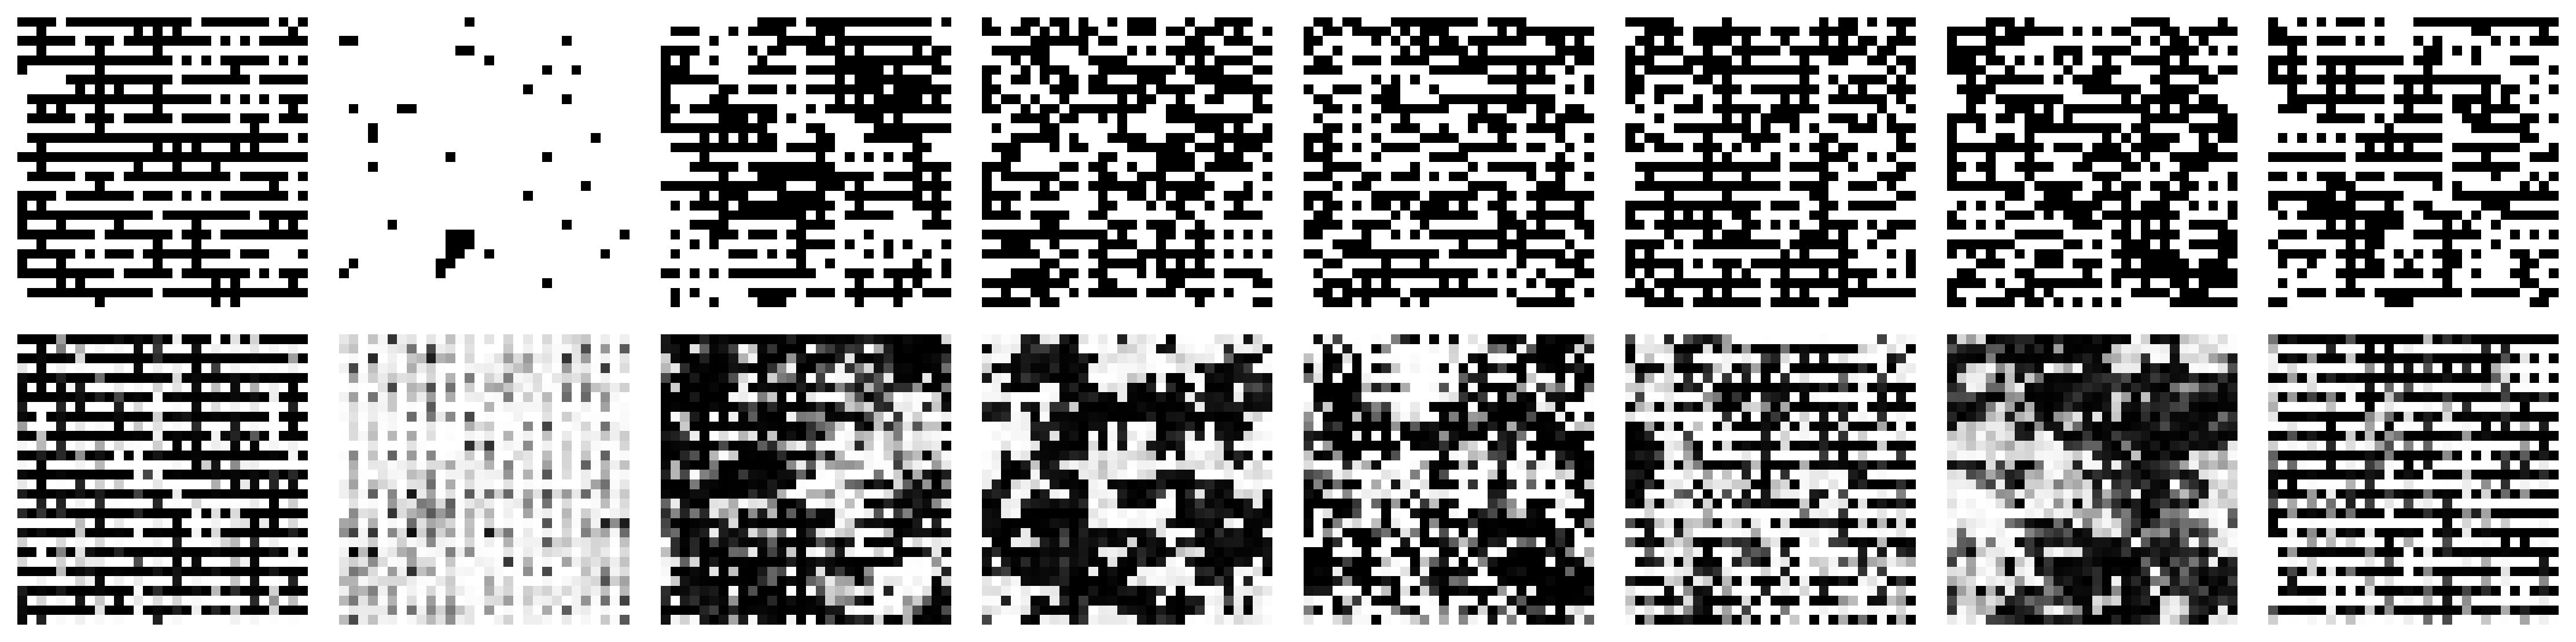

In [18]:
# final_activation = nn.Sigmoid(); criterion = nn.BCELoss(); transform = None
final_activation = nn.Tanh(); criterion = nn.MSELoss(); transform = v2.Compose([v2.Lambda(lambda x: 2*x - 1)])
model = custNN.Autoencoder([900, 750, 600, 450, 300, 150, 75, 30, 10, 2], nn.Tanh(), final_activation)
model.load_state_dict(torch.load(data_dir+f"checkpoints/Autoencoder/"+date+"/2/model_epoch_3990.pth", map_location=device))
# model.load_state_dict(torch.load(data_dir+f"checkpoints/Autoencoder/model.pth", map_location=device))

def visualize_reconstruction(model, data_loader1, data_loader2=None):
    model.eval()
    with torch.no_grad():
        images, _ = next(iter(data_loader1))
        images = images.to(device)
        reconstructed = model(images)

        # Plot original vs reconstructed images
        fig, axes = plt.subplots(2, 8, figsize=(15, 4))
        for i in range(8):
            # Original images
            axes[0,i].imshow(images[i].cpu().numpy().squeeze().reshape(30, 30), cmap='gray')
            axes[0,i].axis('off')

            # Reconstructed images
            axes[1,i].imshow(reconstructed[i].cpu().numpy().squeeze().reshape(30, 30), cmap='gray')
            axes[1,i].axis('off')

        plt.tight_layout()
        plt.show()
        if data_loader2 is None:
            return
        images, _ = next(iter(data_loader2))
        images = images.to(device)
        reconstructed = model(images)

        # Plot original vs reconstructed images
        fig, axes = plt.subplots(2, 8, figsize=(15, 4))
        for i in range(8):
            # Original images
            axes[0,i].imshow(images[i].cpu().numpy().squeeze().reshape(30, 30), cmap='gray')
            axes[0,i].axis('off')

            # Reconstructed images
            axes[1,i].imshow(reconstructed[i].cpu().numpy().squeeze().reshape(30, 30), cmap='gray')
            axes[1,i].axis('off')

        plt.tight_layout()
        plt.show()
        


trainset = ds.CustomAutoencoderDataset(data_dir+"small", side, transform)
data_loader = torch.utils.data.DataLoader(trainset, batch_size=4000, shuffle=True)
testset = ds.CustomAutoencoderDataset(data_dir+"train", side, transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=10000, shuffle=True)

visualize_reconstruction(model, data_loader, test_loader)

    

In [19]:
#calculate test loss
total_loss = 0
model.eval()
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, inputs).cpu().numpy()
        total_loss += loss
print(f"Test Loss: {total_loss / len(test_loader)}")

total_loss = 0
model.eval()
with torch.no_grad():
    for inputs, _ in data_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, inputs).cpu().numpy()
        total_loss += loss
print(f"Train Loss: {total_loss / len(data_loader)}")
loader = test_loader
# loader = data_loader
configs = []; params = []
model.eval()
with torch.no_grad():
    # Get a batch of data
    configs, params = next(iter(loader))
    # images = images.numpy()
    configs = configs.to(device)
    # Pass images through encoder to get latent vectors
    latent_vectors = model.encoder(configs.view(configs.size(0), -1)).cpu().numpy()
    configs = configs.cpu().numpy()
    params = params.cpu().numpy()


Test Loss: 0.9897451996803284
Train Loss: 0.08353198319673538


In [ ]:
smallset = ds.CustomAutoencoderDataset(data_dir+"small", side, transform)
trainset = ds.CustomAutoencoderDataset(data_dir+"train", side, transform)
tinyset = ds.CustomAutoencoderDataset(data_dir+"tiny", side, transform)
testset = ds.CustomAutoencoderDataset(data_dir+"test", side, transform)

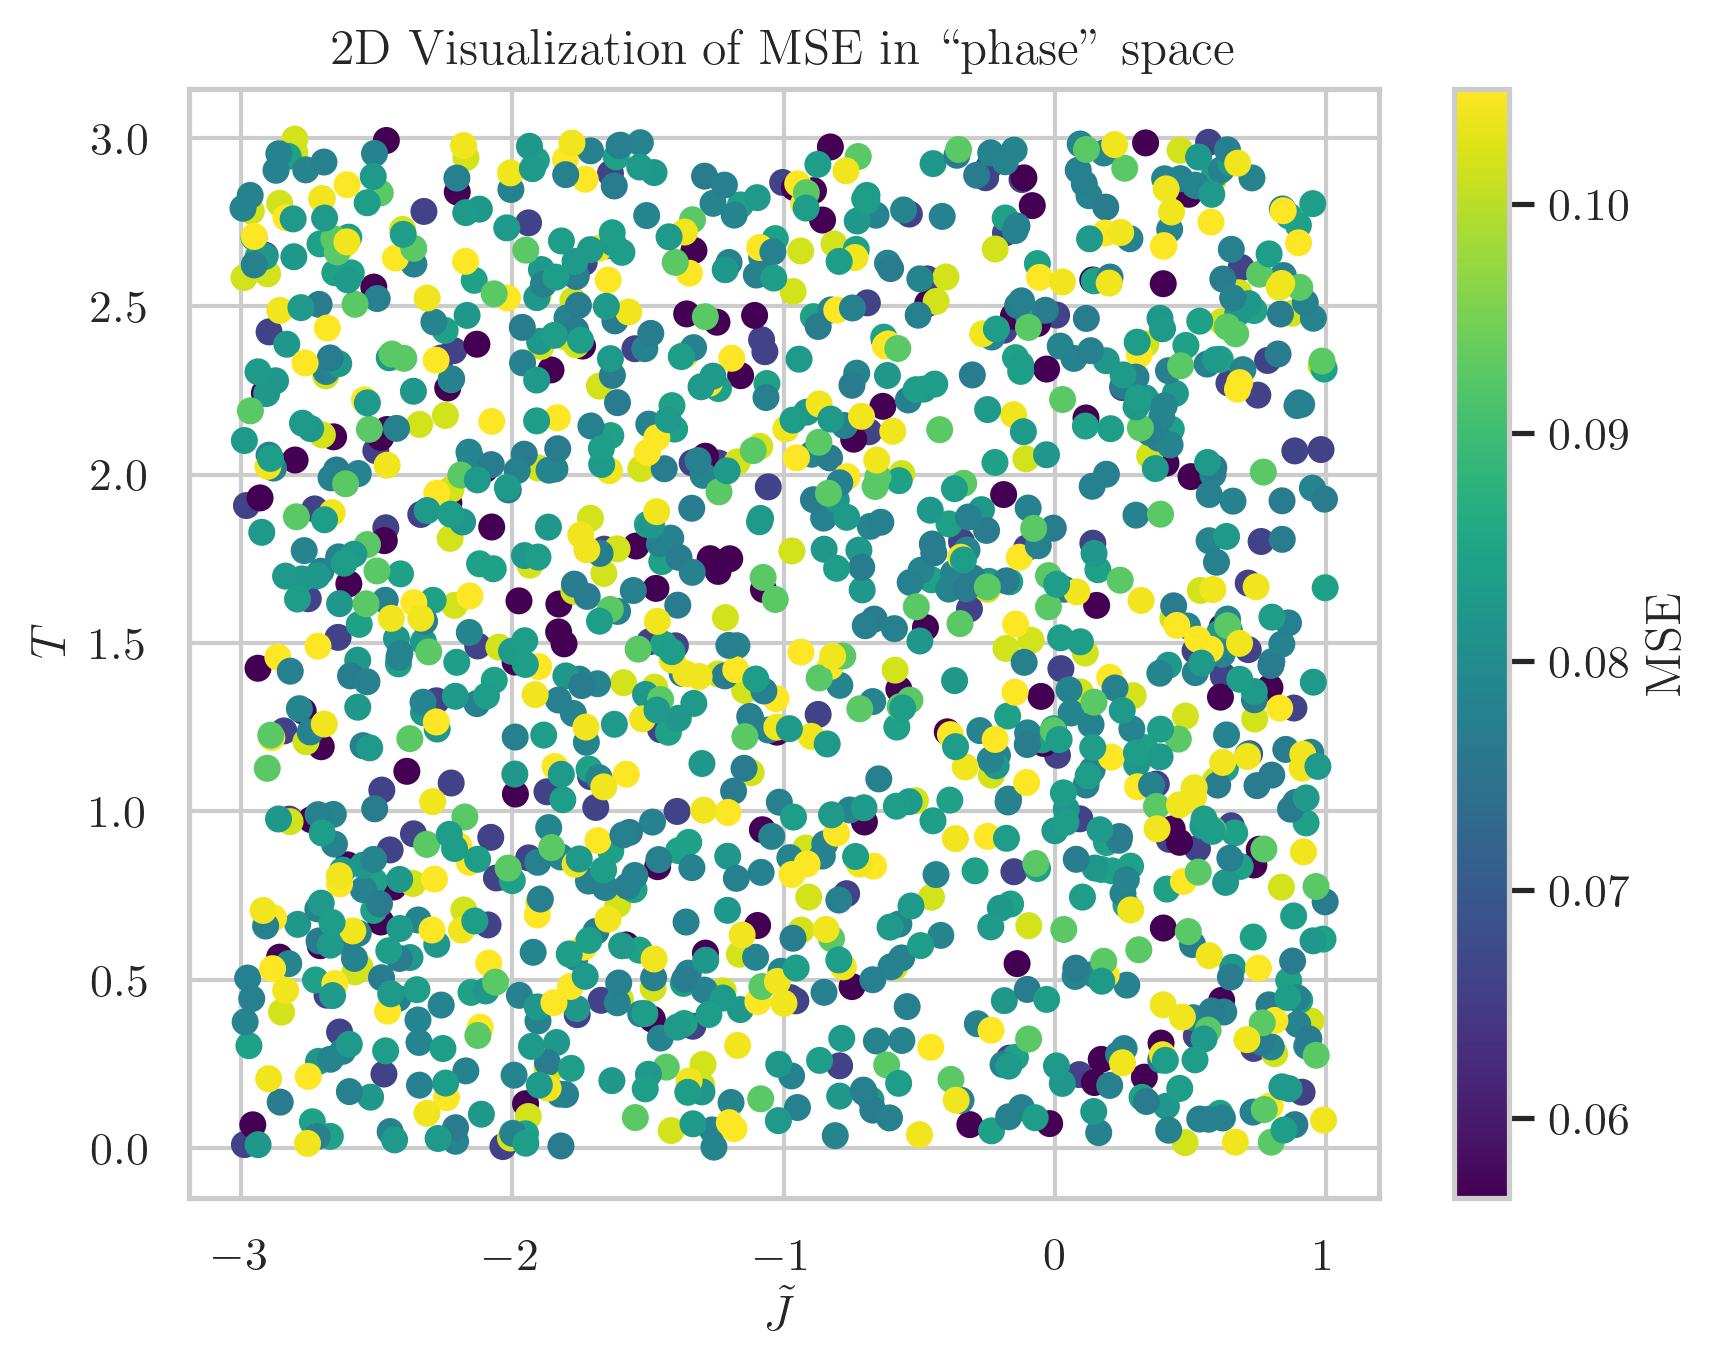

In [28]:
data_loader = torch.utils.data.DataLoader(smallset, batch_size=100, shuffle=False)
params = np.empty((len(data_loader.dataset), 3))

model.eval()
with torch.no_grad():
    for (i,(inputs, paramb)) in enumerate(data_loader):
        inputs = inputs.to(device)
        loss = criterion(model(inputs), inputs).cpu().numpy()
        params[i*data_loader.batch_size:(i+1)*data_loader.batch_size, 0] = paramb[:, 0].cpu().numpy()
        params[i*data_loader.batch_size:(i+1)*data_loader.batch_size, 1] = paramb[:, 1].cpu().numpy()
        params[i*data_loader.batch_size:(i+1)*data_loader.batch_size, 2] = loss
        

scatter = plt.scatter(params[:,0], params[:,1], c=params[:,2], cmap='viridis', s=30)
plt.colorbar(scatter, label='MSE')
plt.title(r'2D Visualization of MSE in ``phase" space')
plt.xlabel(r'$\tilde{J}$')
plt.ylabel(r'$T$')
plt.show()


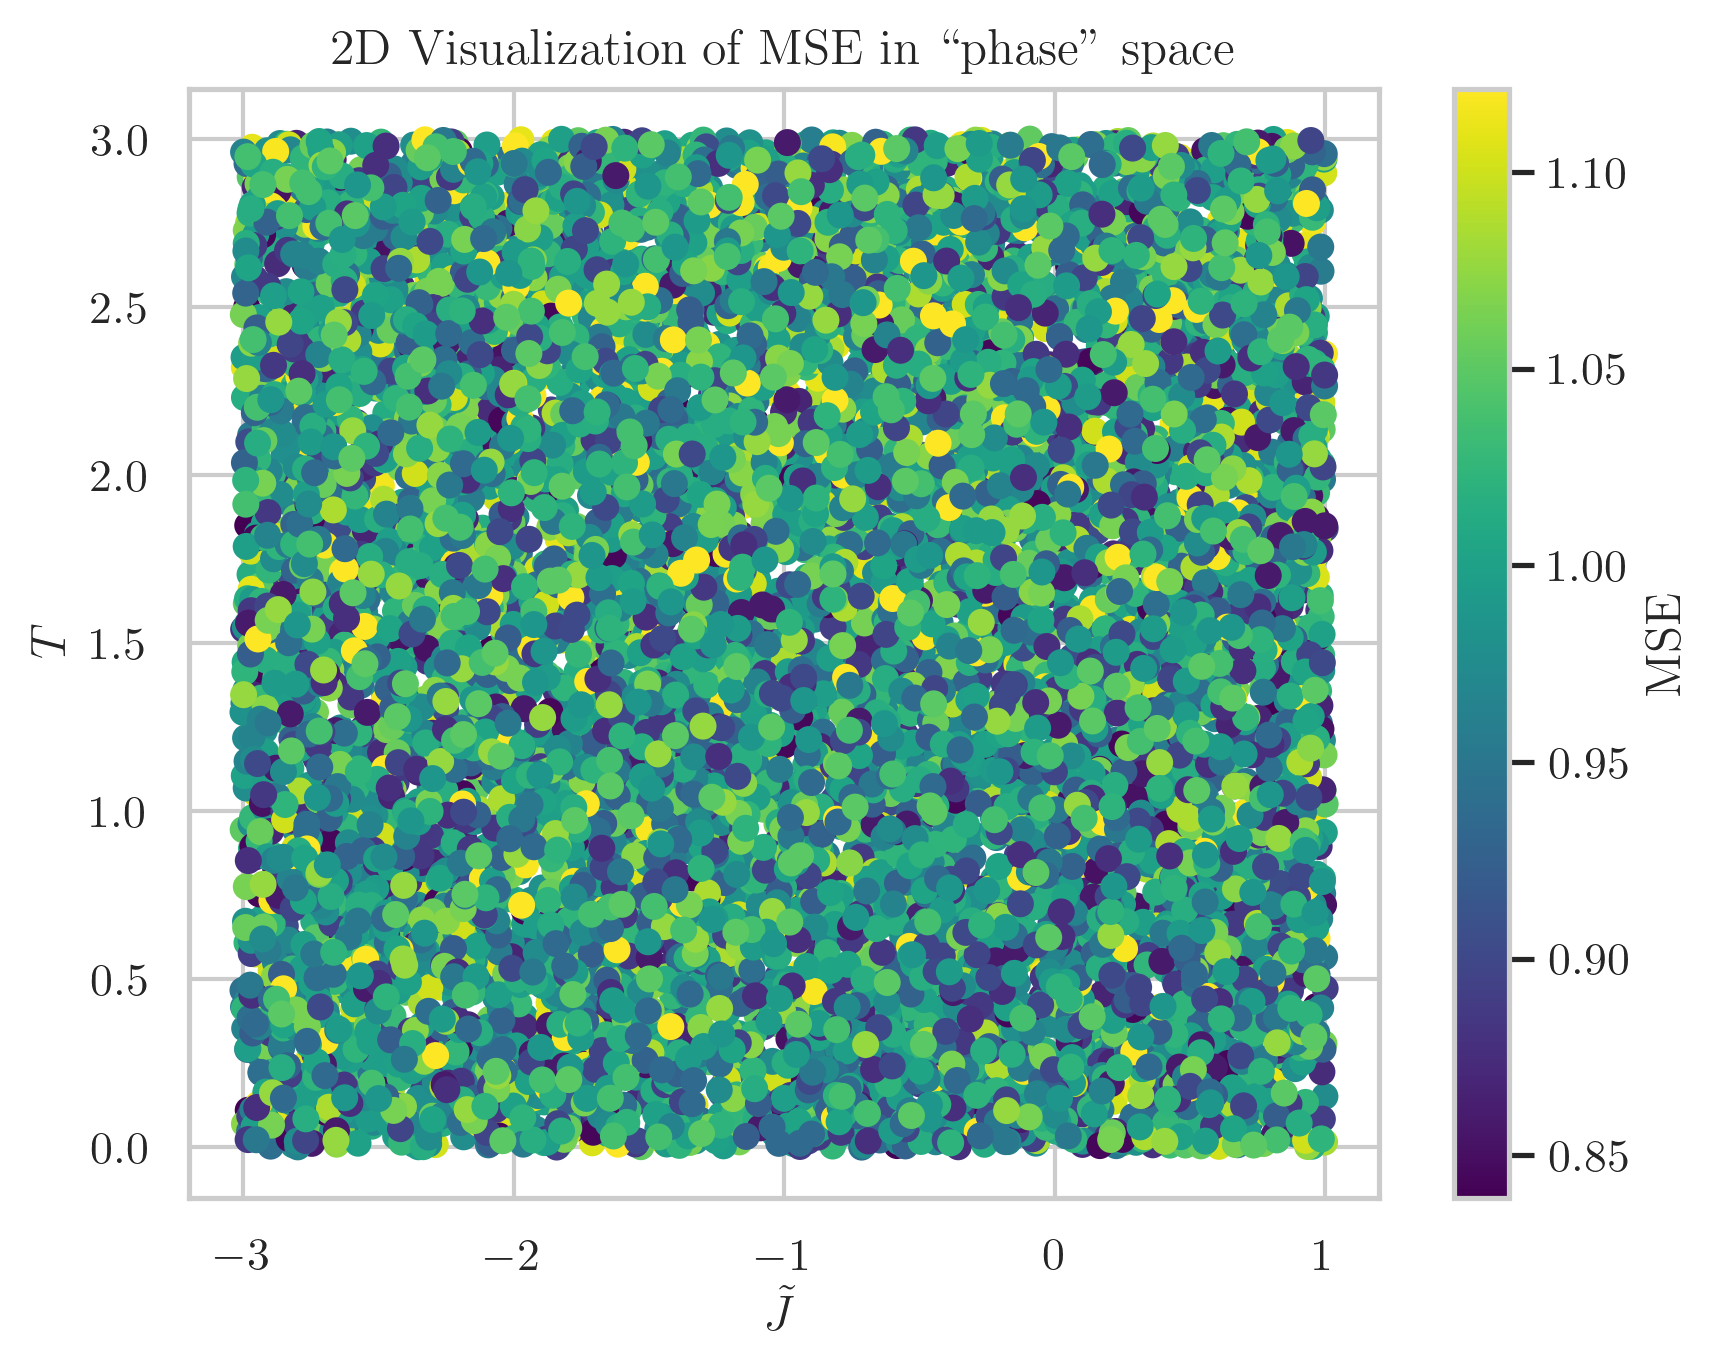

In [29]:
data_loader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=False)
params = np.empty((len(data_loader.dataset), 3))

model.eval()
with torch.no_grad():
    for (i,(inputs, paramb)) in enumerate(data_loader):
        inputs = inputs.to(device)
        loss = criterion(model(inputs), inputs).cpu().numpy()
        params[i*data_loader.batch_size:(i+1)*data_loader.batch_size, 0] = paramb[:, 0].cpu().numpy()
        params[i*data_loader.batch_size:(i+1)*data_loader.batch_size, 1] = paramb[:, 1].cpu().numpy()
        params[i*data_loader.batch_size:(i+1)*data_loader.batch_size, 2] = loss
        

scatter = plt.scatter(params[:,0], params[:,1], c=params[:,2], cmap='viridis', s=30)
plt.colorbar(scatter, label='MSE')
plt.title(r'2D Visualization of MSE in ``phase" space')
plt.xlabel(r'$\tilde{J}$')
plt.ylabel(r'$T$')
plt.show()


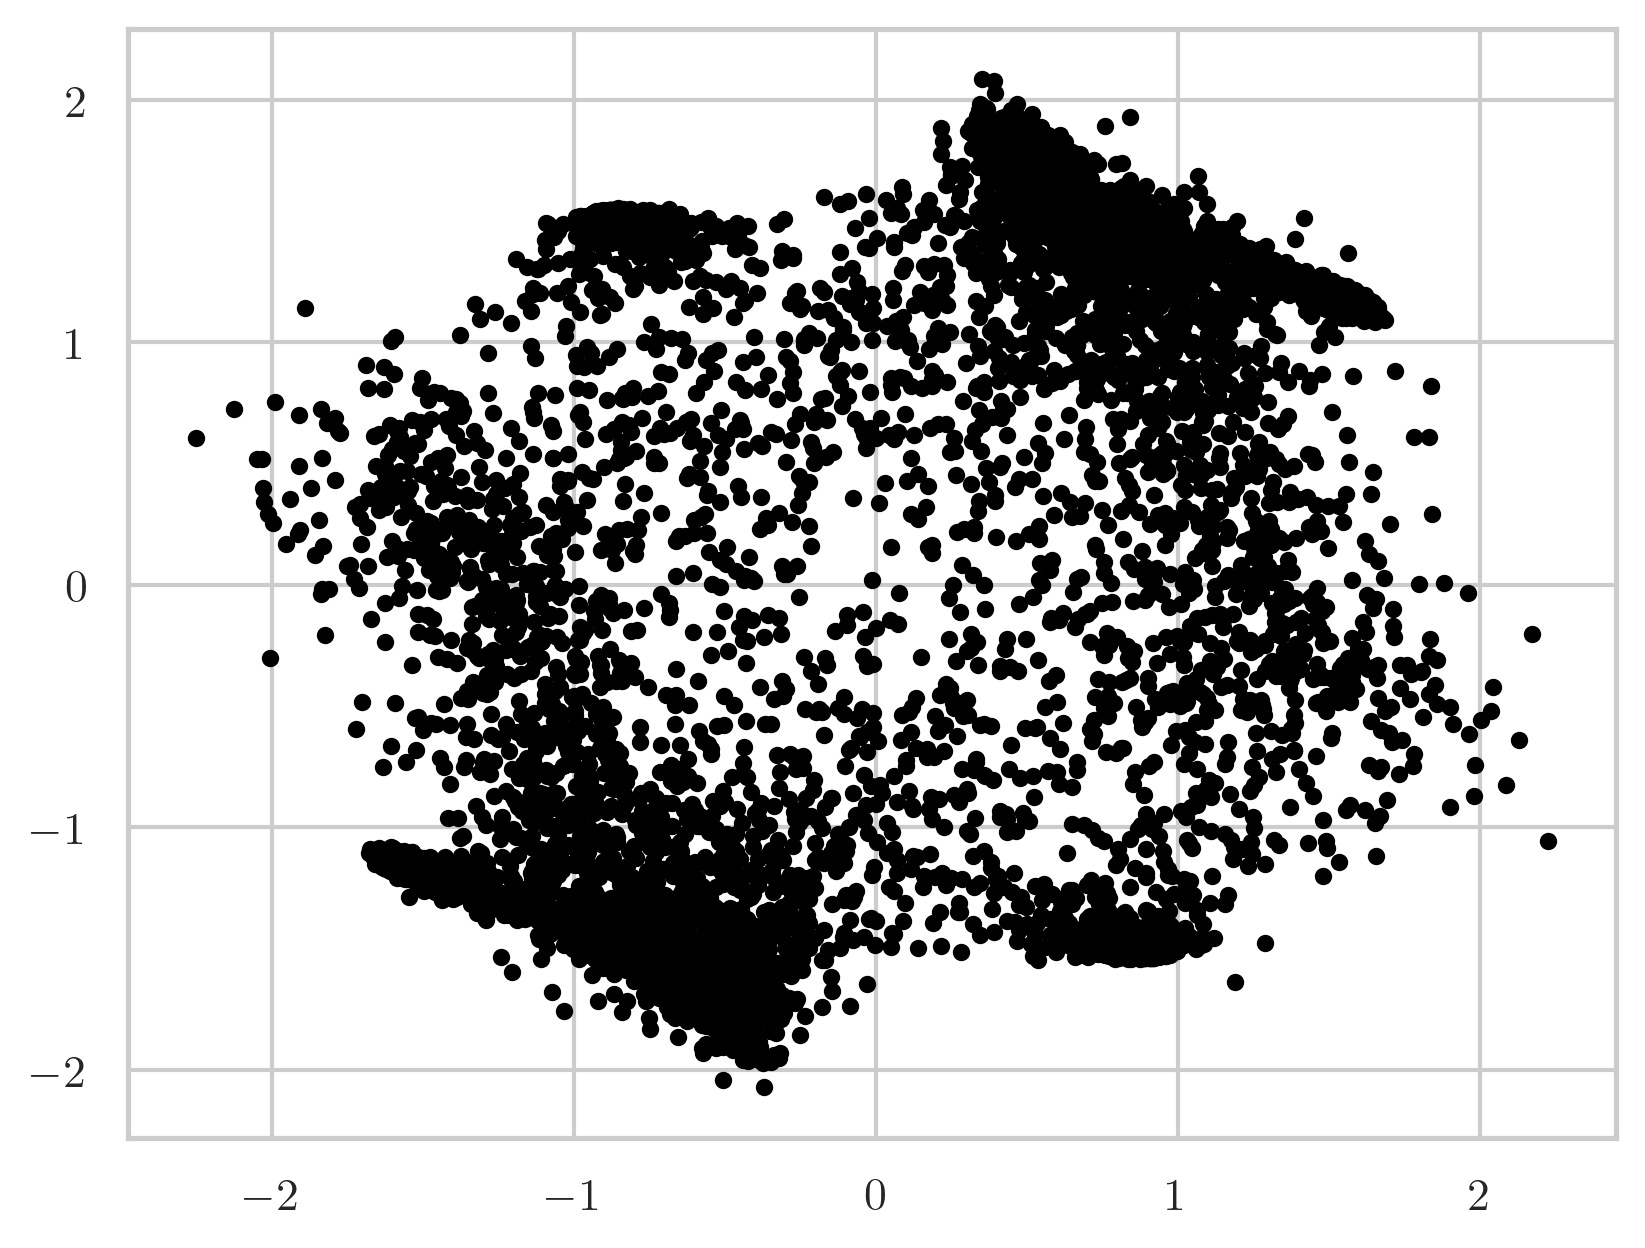

PCA components: (10000, 2)


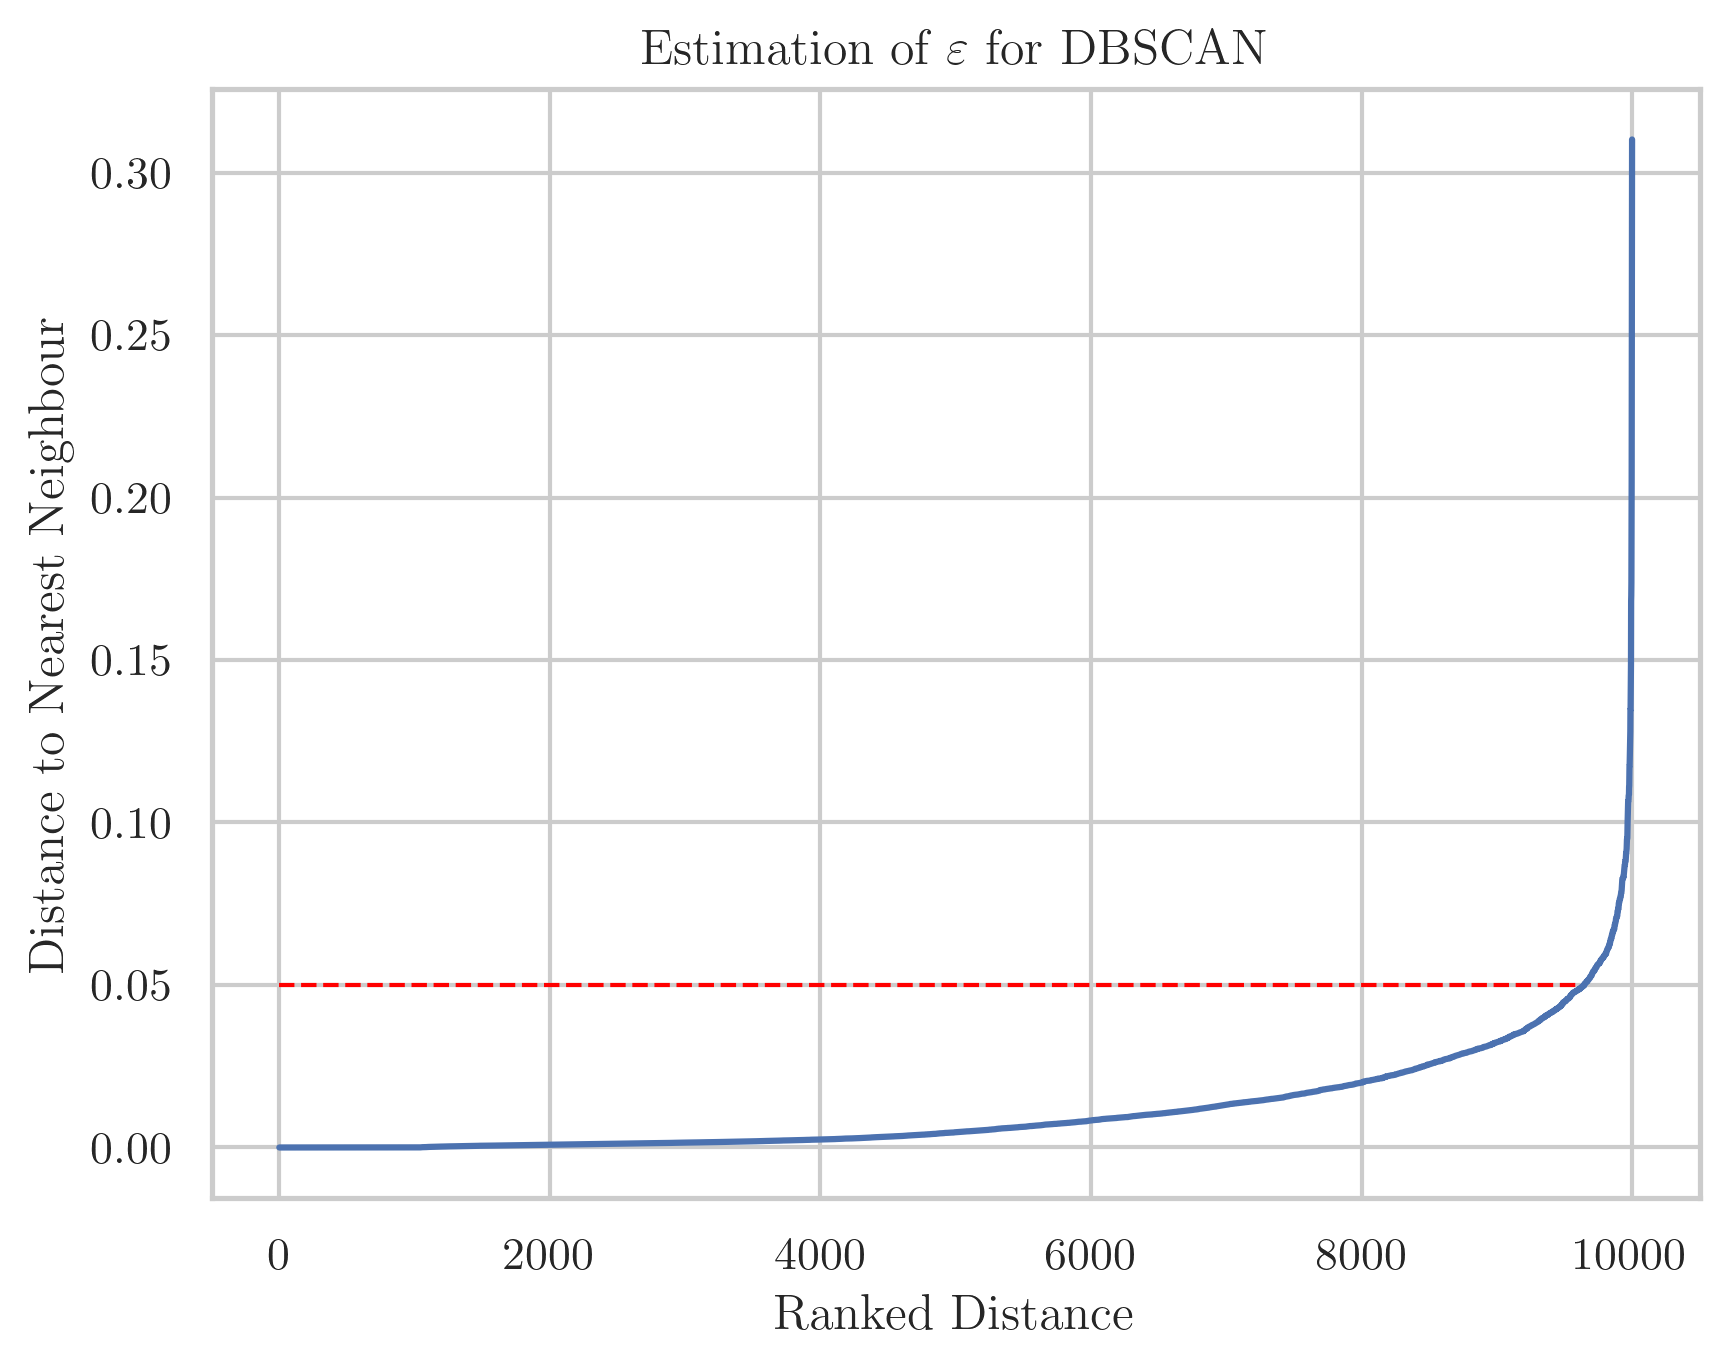

Max derivative: 0.02946583653341789 at index 9996


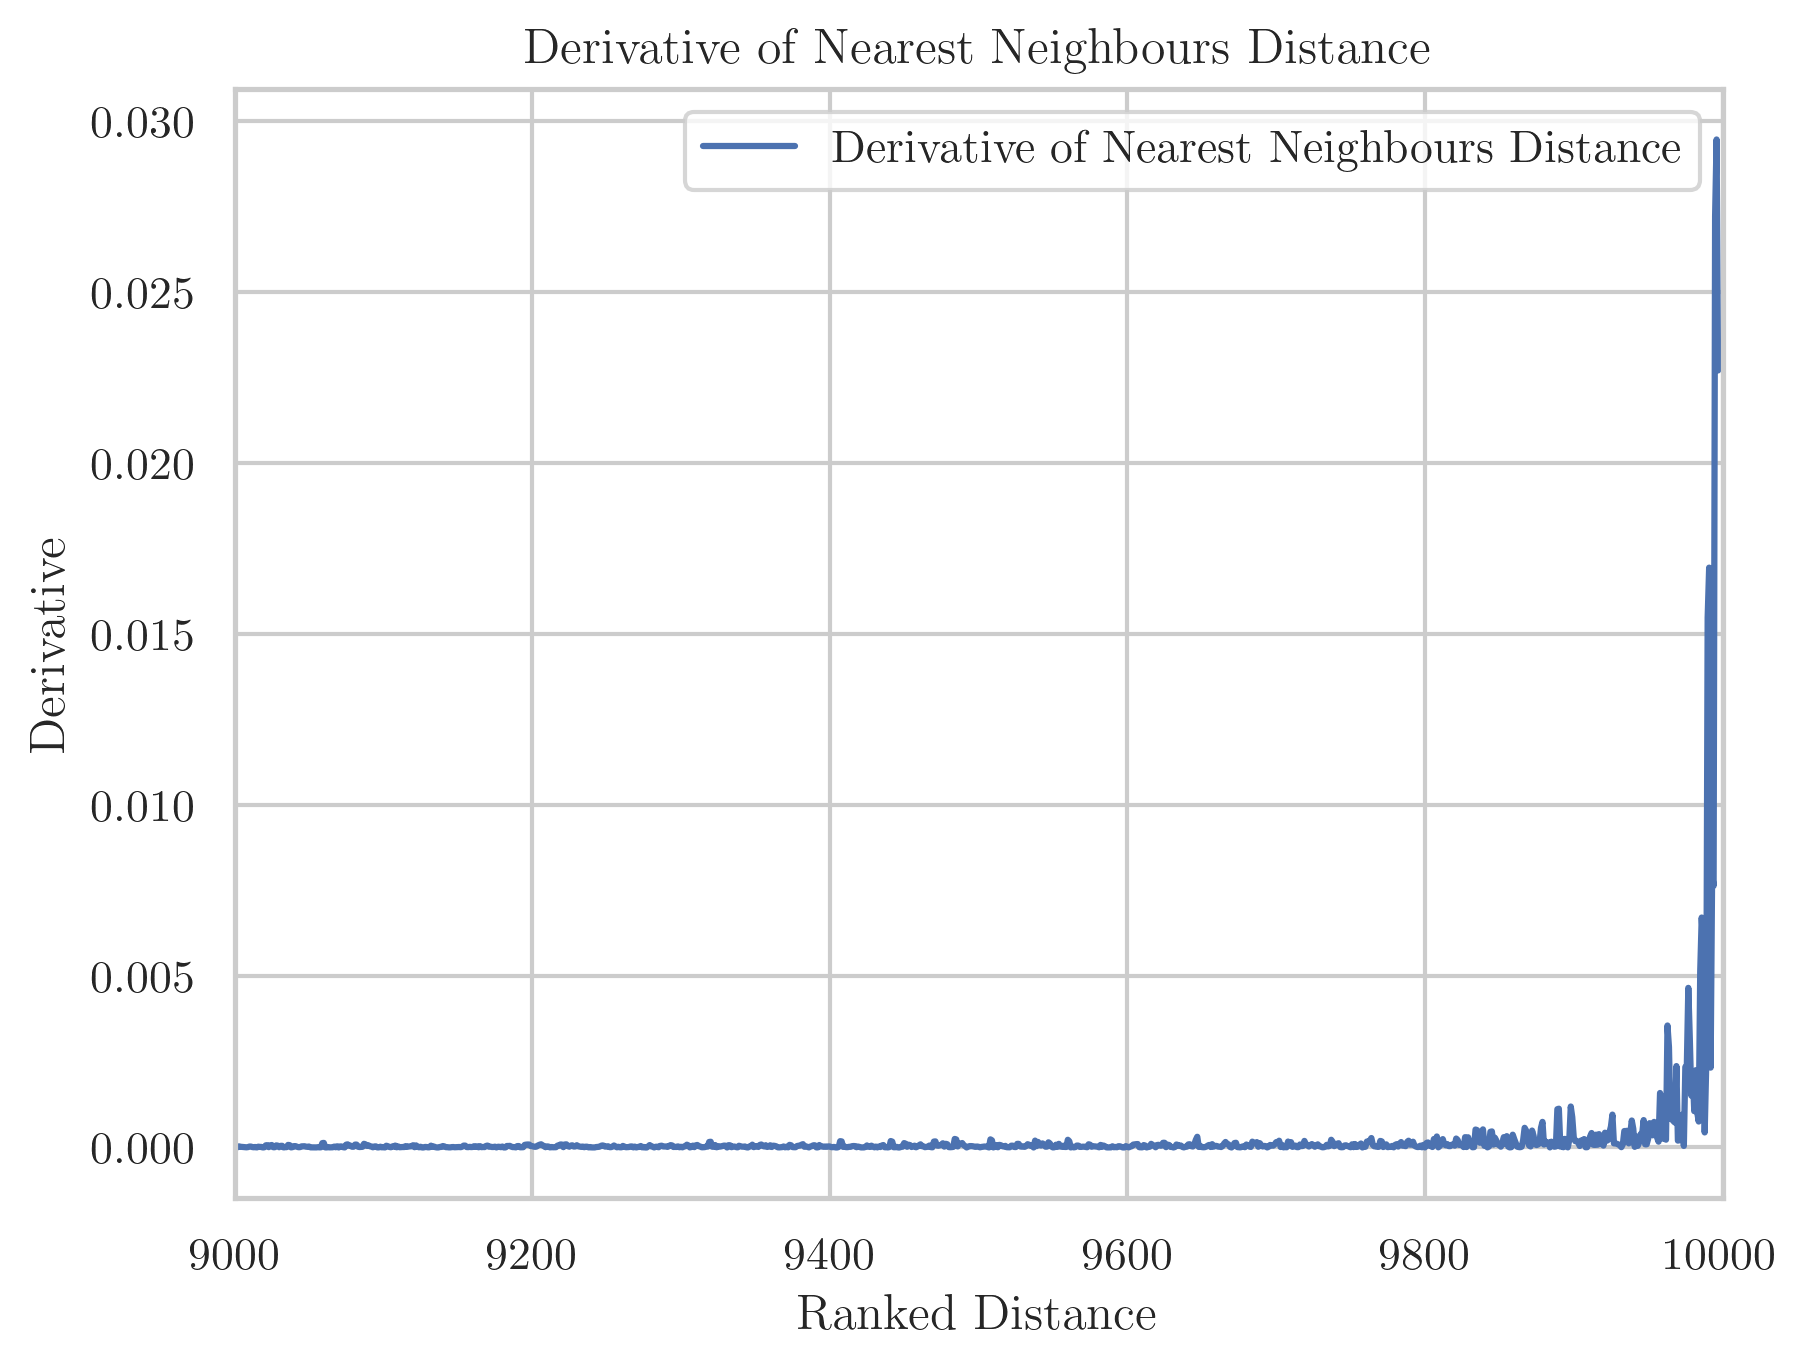

In [152]:
# # Apply t-SNE to reduce latent space to 2D, default perplexity = 30
# # tsne = TSNE(n_components=2, random_state=42, perplexity=10)
# # tSNE_2d = tsne.fit_transform(latent_vectors)


# # pca = PCA(n_components=2)
# # pca_NN = pca.fit_transform(latent_vectors)
# # pca_Raw = pca.fit_transform(configs.reshape(configs.shape[0], -1))


# # plt.plot(tSNE_2d[:, 0], tSNE_2d[:, 1], 'o', markersize=1, alpha=0.5, label='t-SNE')


L1 = latent_vectors[:, 0]; L2 = latent_vectors[:, 1]
plt.scatter(L1, L2, s=10, c='black', label='PCA (NN)')
plt.show()
print("PCA components:", latent_vectors.shape)

neighbours = NearestNeighbors(n_neighbors=10)
neighbours_fit2 = neighbours.fit(latent_vectors)
distances2,_ = neighbours_fit2.kneighbors(latent_vectors)

distances2 = np.sort(distances2, axis=0)
distances2 = distances2[:, 1]  # Exclude the first column (distance to itself)


epsilon = 0.05
min_samples = 100
dbscan2 = DBSCAN(eps=epsilon, min_samples=min_samples)
labels2 = dbscan2.fit_predict(latent_vectors)
plt.hlines(y=epsilon, xmin=0, xmax=np.max(np.where(distances2<epsilon)), color='red', linestyle='--', label=r'$\varepsilon$', linewidth=1)
plt.plot(distances2, label='Nearest Neighbours Distance')
plt.title(r'Estimation of $\varepsilon$ for DBSCAN')
plt.xlabel('Ranked Distance')
plt.ylabel('Distance to Nearest Neighbour')
# plt.ylim(0.0, 0.1)
# plt.xlim(8000, 10000)
plt.show()

# derivative plot of distances2
derivative = np.abs(np.diff(np.diff(distances2)))
plt.plot(derivative, label='Derivative of Nearest Neighbours Distance')
plt.title(r'Derivative of Nearest Neighbours Distance')
print(f"Max derivative: {np.max(derivative)} at index {np.argmax(derivative)}")
plt.xlabel('Ranked Distance')
plt.ylabel('Derivative')
# plt.ylim(0.0, 0.1)
plt.xlim(9000, 10000)
plt.legend()
plt.show()

In [ ]:
# # Apply t-SNE to reduce latent space to 2D, default perplexity = 30
# # tsne = TSNE(n_components=2, random_state=42, perplexity=10)
# # tSNE_2d = tsne.fit_transform(latent_vectors)


# # pca = PCA(n_components=2)
# # pca_NN = pca.fit_transform(latent_vectors)
# # pca_Raw = pca.fit_transform(configs.reshape(configs.shape[0], -1))


# # plt.plot(tSNE_2d[:, 0], tSNE_2d[:, 1], 'o', markersize=1, alpha=0.5, label='t-SNE')


L1 = latent_vectors[:, 0]; L2 = latent_vectors[:, 1]
plt.scatter(L1, L2, s=10, c='black', label='PCA (NN)')
plt.show()
print("PCA components:", latent_vectors.shape)

neighbours = NearestNeighbors(n_neighbors=10)
neighbours_fit2 = neighbours.fit(latent_vectors)
distances2,_ = neighbours_fit2.kneighbors(latent_vectors)

distances2 = np.sort(distances2, axis=0)
distances2 = distances2[:, 1]  # Exclude the first column (distance to itself)
print("Nearest Neighbours distances:", distances2.shape)
plt.plot(distances2, label='Nearest Neighbours Distance')
plt.title(r'Estimation of $\varepsilon$ for DBSCAN')
plt.xlabel('Ranked Distance')
plt.ylabel('Distance to Nearest Neighbour')
plt.show()


# coordinate transformation
L1 = latent_vectors[:, 0]*np.cos(latent_vectors[:, 1]); L2 = latent_vectors[:, 0]*np.sin(latent_vectors[:, 1])
aeTrans = np.column_stack((L1, L2))

plt.scatter(L1, L2, s=10, c='black', label='Autoencoder Latent Space')
plt.show()

# neighbours = NearestNeighbors(n_neighbors=10)
neighbours_fit2 = neighbours.fit(aeTrans)
distances2,_ = neighbours_fit2.kneighbors(aeTrans)

distances2 = np.sort(distances2, axis=0)
distances2 = distances2[:, 1]  # Exclude the first column (distance to itself)



epsilon = 0.23
min_samples = 20
dbscan2 = DBSCAN(eps=epsilon, min_samples=min_samples)
labels2 = dbscan2.fit_predict(latent_vectors)
plt.hlines(y=epsilon, xmin=0, xmax=np.max(np.where(distances2<epsilon)), color='red', linestyle='--', label=r'$\varepsilon$', linewidth=1)
plt.plot(distances2, label='Nearest Neighbours Distance')
plt.title(r'Estimation of $\varepsilon$ for DBSCAN')
plt.xlabel('Ranked Distance')
plt.ylabel('Distance to Nearest Neighbour')
# plt.ylim(0.0, 0.150)
# plt.xlim(3550, 4000)
plt.show()

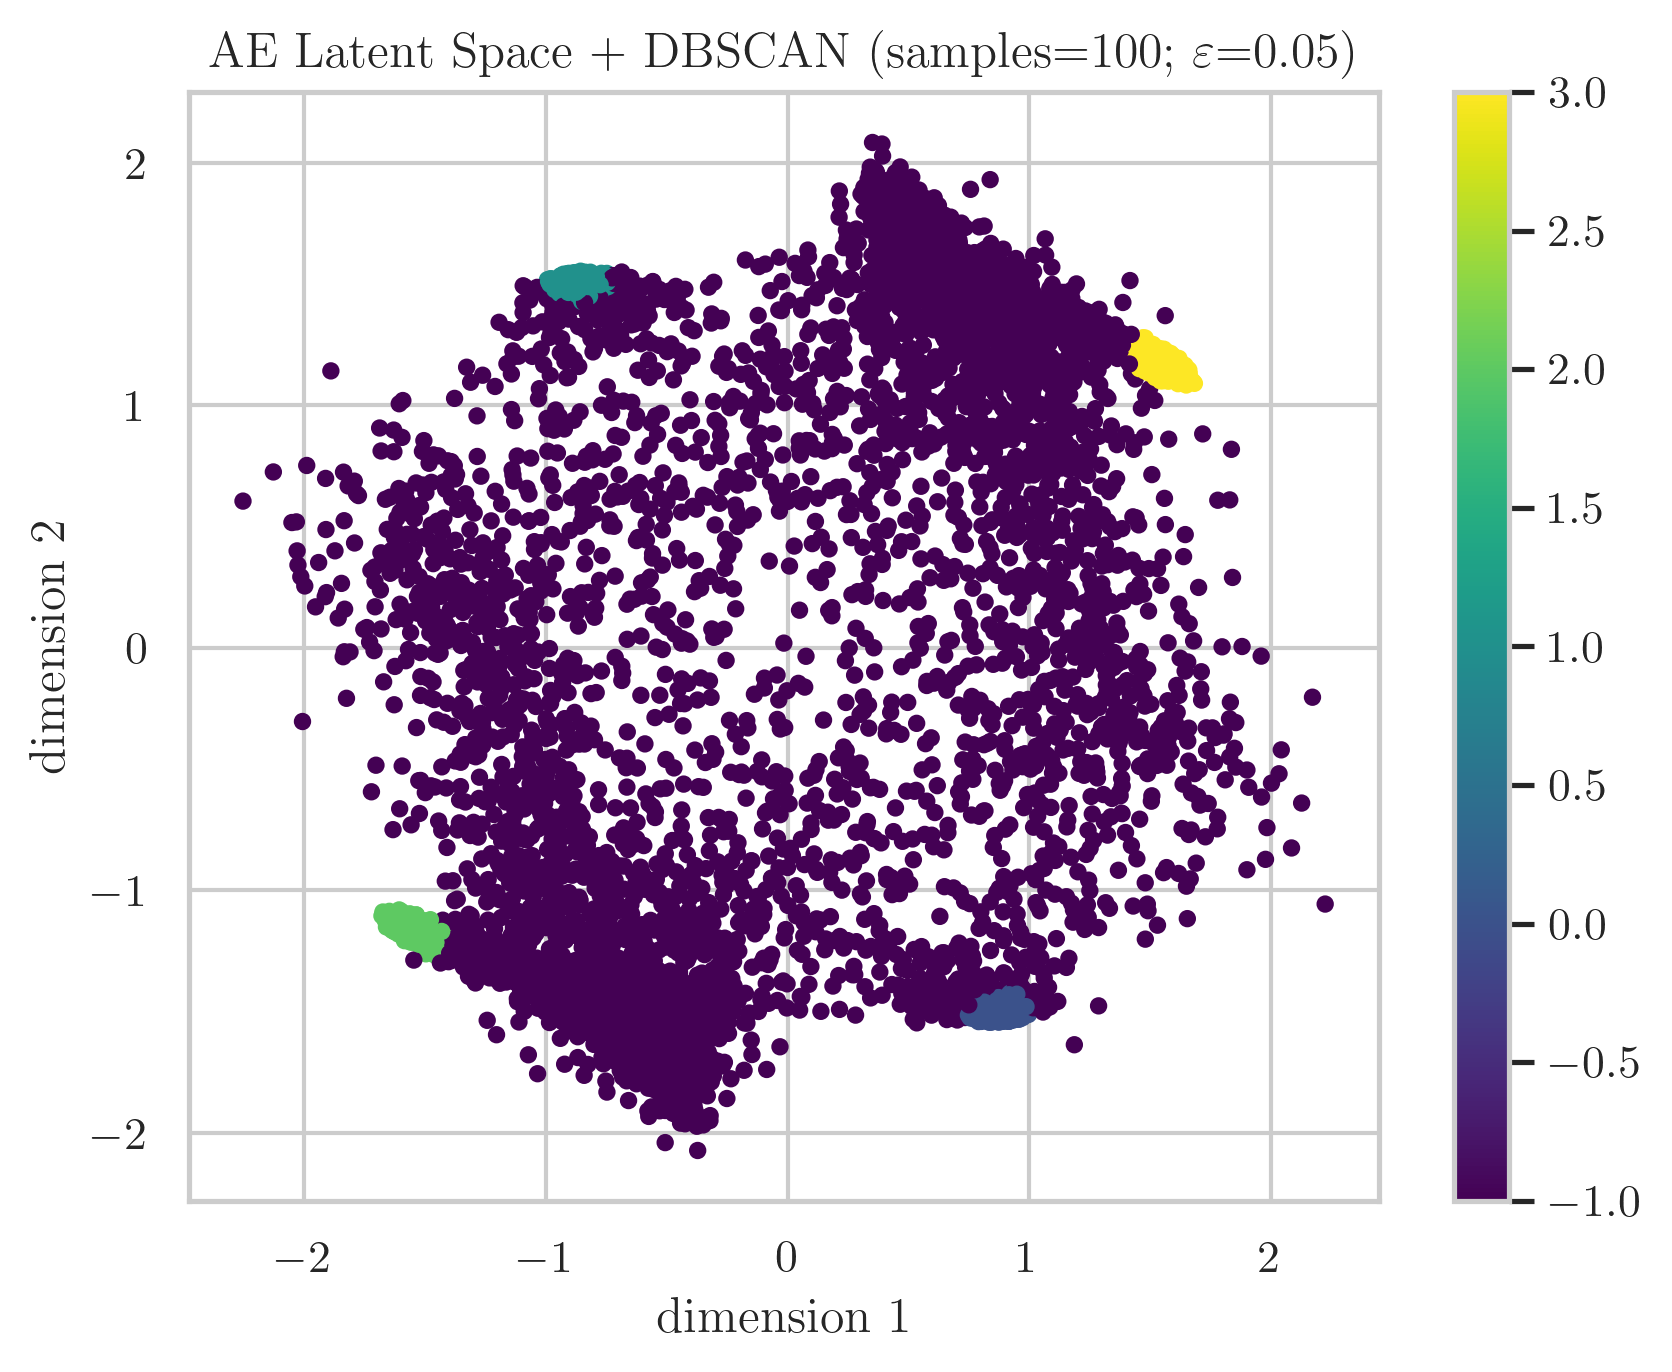

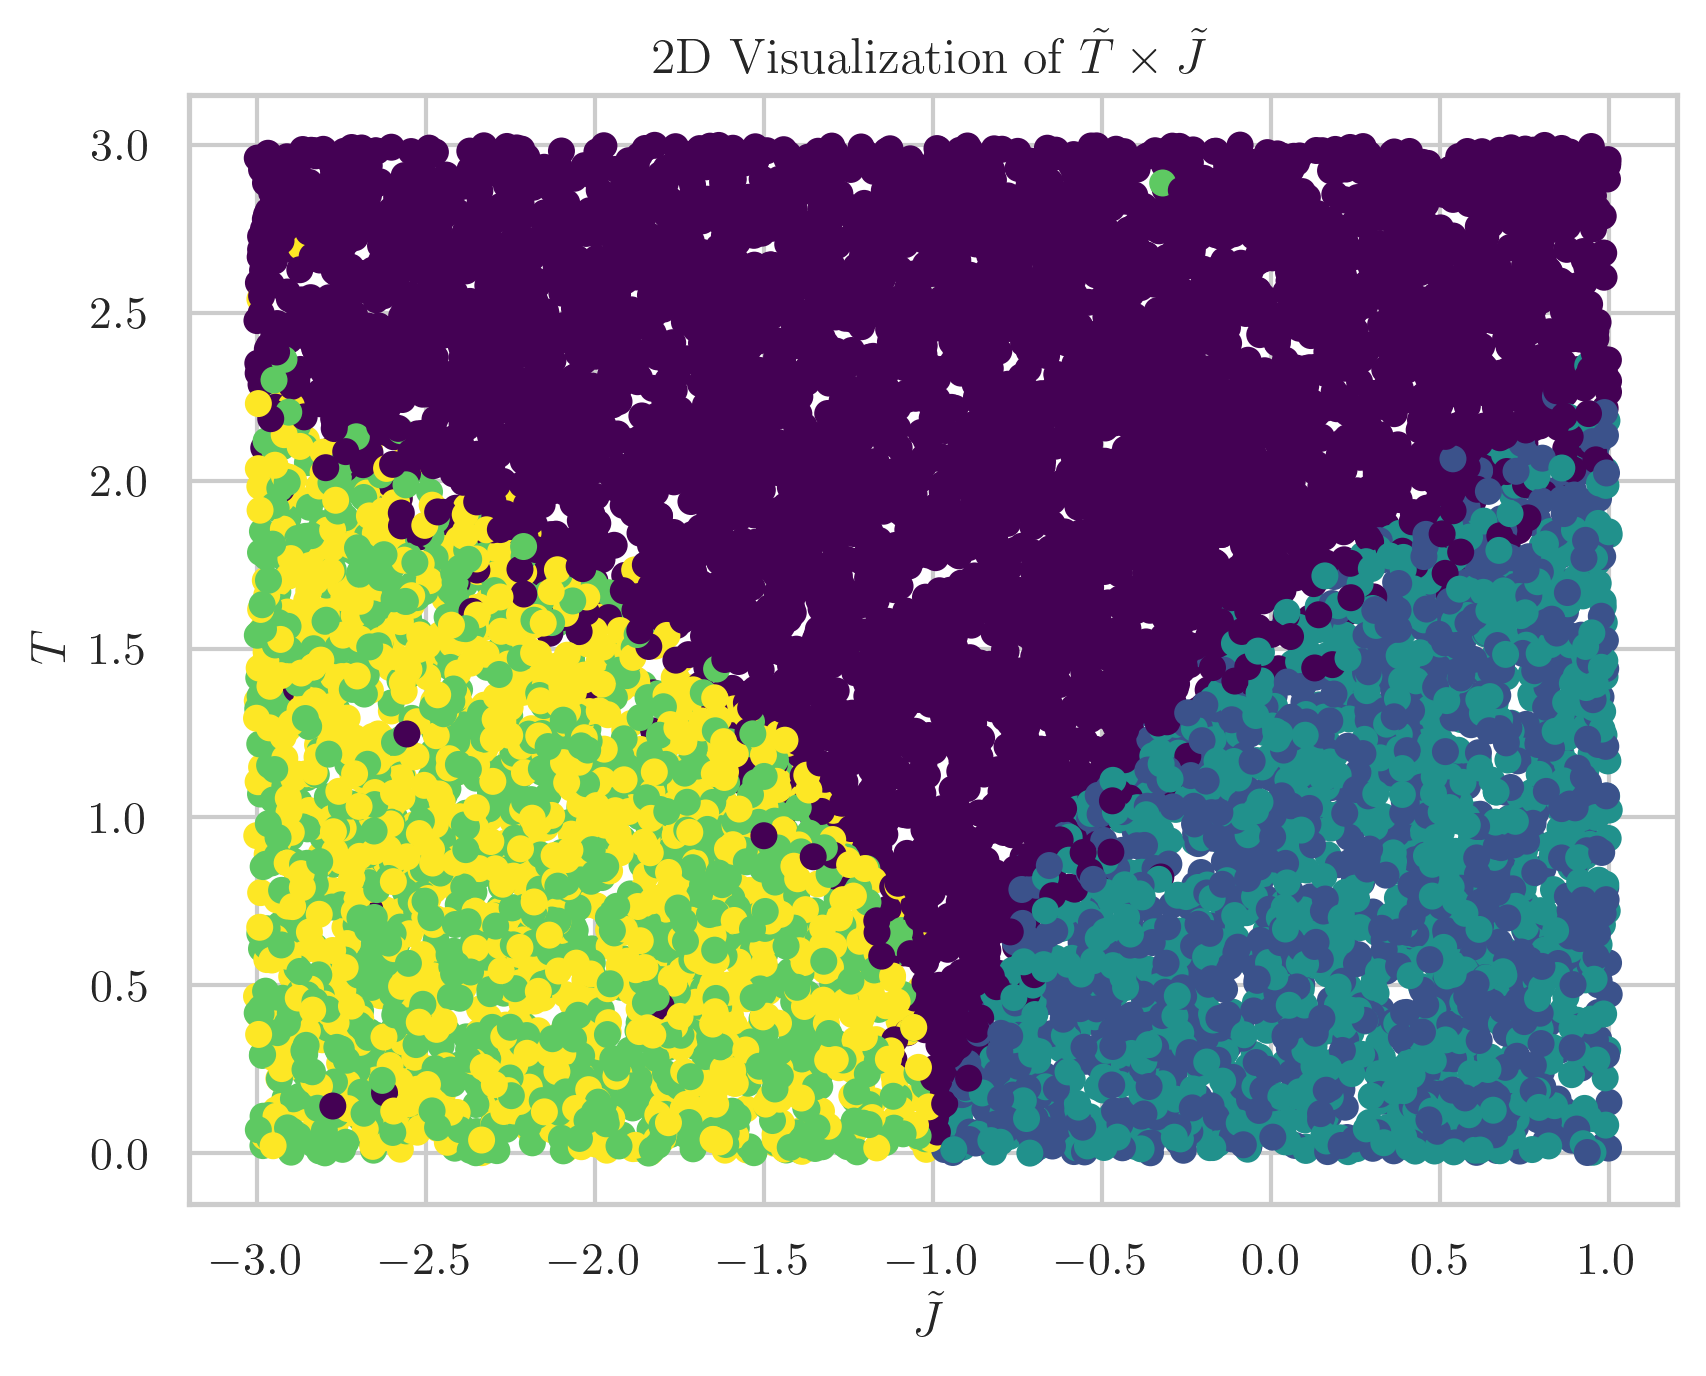

In [147]:
scatter2 = plt.scatter(L1, L2, c=labels2, cmap='viridis', s=10)
plt.colorbar(scatter2)
plt.title(rf"AE Latent Space + DBSCAN (samples={min_samples}; $\varepsilon$={epsilon})")
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
# plt.legend()
plt.show()



plt.scatter(params[:, 0], params[:,1], c=labels2, cmap='viridis', s=30)
# plt.colorbar(scatter, ticks=range(10), label='PCA of Latent Space')
plt.title(r'2D Visualization of $\tilde{T} \times \tilde{J}$')
plt.xlabel(r'$\tilde{J}$')
plt.ylabel(r'$T$')
plt.show()


In [ ]:

# model.load_state_dict(torch.load(data_dir+f"checkpoints/Autoencoder/2025-06-12_18/2/model_epoch_990.pth", map_location=device))
visualize_reconstruction(model, testLoader)
# visualize_reconstruction(model,  smallTrainLoader)


model.load_state_dict(torch.load(data_dir+f"checkpoints/Autoencoder/2025-06-12_18/1/model_epoch_50.pth", map_location=device))
visualize_reconstruction(model, testLoader)
# visualize_reconstruction(model,  smallTrainLoader)
